# Openfoodfacts : analyse exploratoire des données

In [6]:
%matplotlib inline

import os
import zipfile
import urllib

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

import qgrid

FOOD_PATH = os.path.join("datasets", "openfoodfacts")
FOOD_TRANSFORMED_PATH_FILE = os.path.join(FOOD_PATH, "fr.openfoodfacts.org.products_transformed.csv")

import seaborn as sns
sns.set()

plt.rcParams["figure.figsize"] = [16,9] # Taille par défaut des figures de matplotlib

pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows",1000)



# Import des données

In [7]:
import pandas as pd

def load_food_data(csv_path=FOOD_TRANSFORMED_PATH_FILE):
    return pd.read_csv(csv_path, sep=',', header=0, encoding='utf-8', low_memory=False)



In [8]:
food = load_food_data()

# Informations globales sur les données

In [9]:
food.head()

code  last_modified_t        product_name  \
0  0000000003087       1474103893  Farine de blé noir   
1  0000000024600       1434535914       Filet de bœuf   
2  0000000027205       1458238638                 NaN   
3  0000000036252       1489055667      Lion Peanut x2   
4  0000000039259       1473538082             Twix x2   

                                         states_tags main_category_fr  \
0  en:to-be-completed,en:nutrition-facts-to-be-co...              NaN   
1  en:to-be-completed,en:nutrition-facts-to-be-co...   Filet-de-boeuf   
2  en:to-be-completed,en:nutrition-facts-to-be-co...              NaN   
3  en:to-be-completed,en:nutrition-facts-complete...              NaN   
4  en:to-be-completed,en:nutrition-facts-to-be-co...              NaN   

            brands      brands_tags nutrition_grade_fr  energy_100g  \
0  Ferme t'y R'nao  ferme-t-y-r-nao                NaN          NaN   
1              NaN              NaN                NaN          NaN   
2              NaN              NaN                NaN          NaN   
3         Sunridge         sunridge                  e       1883.0   
4              NaN              NaN                NaN          NaN   

   sugars_100g  salt_100g  saturated-fat_100g  fiber_100g  proteins_100g  \
0          NaN        NaN                 NaN         NaN            NaN   
1          NaN        NaN                 NaN         NaN            NaN   
2          NaN        NaN                 NaN         NaN            NaN   
3         57.5    0.09652                12.5         2.5            2.5   
4          NaN        NaN                 NaN         NaN            NaN   

   ingredients_from_palm_oil_n pnns_groups_2 pnns_groups_1 labels_tags  \
0                          NaN           NaN           NaN         NaN   
1                          NaN       unknown       unknown         NaN   
2                          NaN           NaN           NaN         NaN   
3                          0.0       unknown       unknown         NaN   
4                          NaN       unknown       unknown         NaN   

               countries_tags additives_tags  additives_n  \
0                   en:france            NaN          NaN   
1                   en:france            NaN          NaN   
2                   en:france            NaN          NaN   
3  en:france,en:united-states        en:e322          1.0   
4                   en:france            NaN          NaN   

                                    ingredients_text  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3  Milk chocolate coating (evaporated cane juice,...   
4                                                NaN   

                                           image_url  nutrition_scoring  \
0                                                NaN                NaN   
1  http://fr.openfoodfacts.org/images/products/00...                NaN   
2  http://fr.openfoodfacts.org/images/products/00...                NaN   
3  http://fr.openfoodfacts.org/images/products/00...                1.0   
4  http://fr.openfoodfacts.org/images/products/00...                NaN   

   no_ingredients  no_ingredients_scoring  additives_nocive_scoring  \
0             NaN                     NaN                       NaN   
1             NaN                     NaN                       NaN   
2             NaN                     NaN                       NaN   
3            10.0                     2.0                       5.0   
4             NaN                     NaN                       NaN   

   energy_100g_scoring  salt_100g_scoring  sugars_100g_scoring  \
0                  NaN                NaN                  NaN   
1                  NaN                NaN                  NaN   
2                  NaN                NaN                  NaN   
3                  2.0                5.0              

In [59]:
qgrid.show_grid(food, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 150})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…

In [10]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98440 entries, 0 to 98439
Data columns (total 34 columns):
code                           98440 non-null object
last_modified_t                98440 non-null int64
product_name                   91247 non-null object
states_tags                    98440 non-null object
main_category_fr               61955 non-null object
brands                         86426 non-null object
brands_tags                    86422 non-null object
nutrition_grade_fr             61415 non-null object
energy_100g                    64593 non-null float64
sugars_100g                    62515 non-null float64
salt_100g                      62574 non-null float64
saturated-fat_100g             62375 non-null float64
fiber_100g                     45723 non-null float64
proteins_100g                  64318 non-null float64
ingredients_from_palm_oil_n    53466 non-null float64
pnns_groups_2                  67038 non-null object
pnns_groups_1                  64881 

In [11]:
scoring_features = ['nutrition_scoring', 'bio_scoring', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring']

quantity_features = ['energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g', 'fiber_100g', 'proteins_100g' ]

# Anayse univariée des features de scoring

In [12]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98440 entries, 0 to 98439
Data columns (total 34 columns):
code                           98440 non-null object
last_modified_t                98440 non-null int64
product_name                   91247 non-null object
states_tags                    98440 non-null object
main_category_fr               61955 non-null object
brands                         86426 non-null object
brands_tags                    86422 non-null object
nutrition_grade_fr             61415 non-null object
energy_100g                    64593 non-null float64
sugars_100g                    62515 non-null float64
salt_100g                      62574 non-null float64
saturated-fat_100g             62375 non-null float64
fiber_100g                     45723 non-null float64
proteins_100g                  64318 non-null float64
ingredients_from_palm_oil_n    53466 non-null float64
pnns_groups_2                  67038 non-null object
pnns_groups_1                  64881 

In [13]:
food.describe()

last_modified_t   energy_100g   sugars_100g     salt_100g  \
count     9.844000e+04  6.459300e+04  62515.000000  62574.000000   
mean      1.468599e+09  1.171553e+03     13.432792      1.160535   
std       2.574637e+07  1.283590e+04     19.087618      4.309815   
min       1.333873e+09  0.000000e+00     -0.100000      0.000000   
25%       1.453544e+09  4.270000e+02      1.000000      0.080000   
50%       1.477596e+09  1.035000e+03      4.100000      0.558800   
75%       1.488821e+09  1.649000e+03     17.800000      1.244600   
max       1.492736e+09  3.251373e+06    105.000000    211.000000   

       saturated-fat_100g    fiber_100g  proteins_100g  \
count        62375.000000  45723.000000   64318.000000   
mean             5.423696      2.559271       7.754531   
std              8.531083      4.634788       7.887373   
min              0.000000      0.000000       0.000000   
25%              0.300000      0.000000       1.800000   
50%              2.000000      1.380000       6.000000   
75%              7.400000      3.200000      11.000000   
max            210.000000    178.000000     100.000000   

       ingredients_from_palm_oil_n   additives_n  nutrition_scoring  \
count                 53466.000000  53466.000000       61415.000000   
mean                      0.069839      1.856619           2.820874   
std                       0.258593      2.561405           1.352756   
min                       0.000000      0.000000           1.000000   
25%                       0.000000      0.000000           2.000000   
50%                       0.000000      1.000000           3.000000   
75%                       0.000000      3.000000           4.000000   
max                       2.000000     31.000000           5.000000   

       no_ingredients  no_ingredients_scoring  additives_nocive_scoring  \
count    53466.000000            53466.000000              30456.000000   
mean        10.421632                2.815696                  4.054768   
std         10.191214                1.690744                  1.699282   
min          1.000000                1.000000                  1.000000   
25%          3.000000                1.000000                  5.000000   
50%          7.000000                3.000000                  5.000000   
75%         15.000000                5.000000                  5.000000   
max        138.000000                5.000000                  5.000000   

       energy_100g_scoring  salt_100g_scoring  sugars_100g_scoring  \
count         64593.000000       62574.000000         62515.000000   
mean              3.393820           3.485170             3.854115   
std               1.155246           1.510884             1.493550   
min               1.000000           1.000000             1.000000   
25%               3.000000           2.000000             3.000000   
50%               3.000000           4.000000             5.000000   
75%               4.000000           5.000000             5.000000   
max               5.000000           5.000000             5.000000   

       saturated-fat_100g_scoring  fiber_100g_scoring  proteins_100g_scoring  \
count                62375.000000        45723.000000           64318.000000   
mean                     3.431086            2.074230               3.051012   
std                      1.650643            1.512065               1.711937   
min                      1.000000            1.000000               1.000000   
25%                      1.000000            1.000000               1.000000   
50%                      4.000000            1.000000               3.000000   
75%                      5.000000            3.000000               5.000000   
max                      5.000000            5.000000               5.000000   

        bio_scoring  
count  35139.000000  
mean       2.346766  
std        1.776803  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        5.000000  
max        5.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa43514c490>,
      dtype=object)

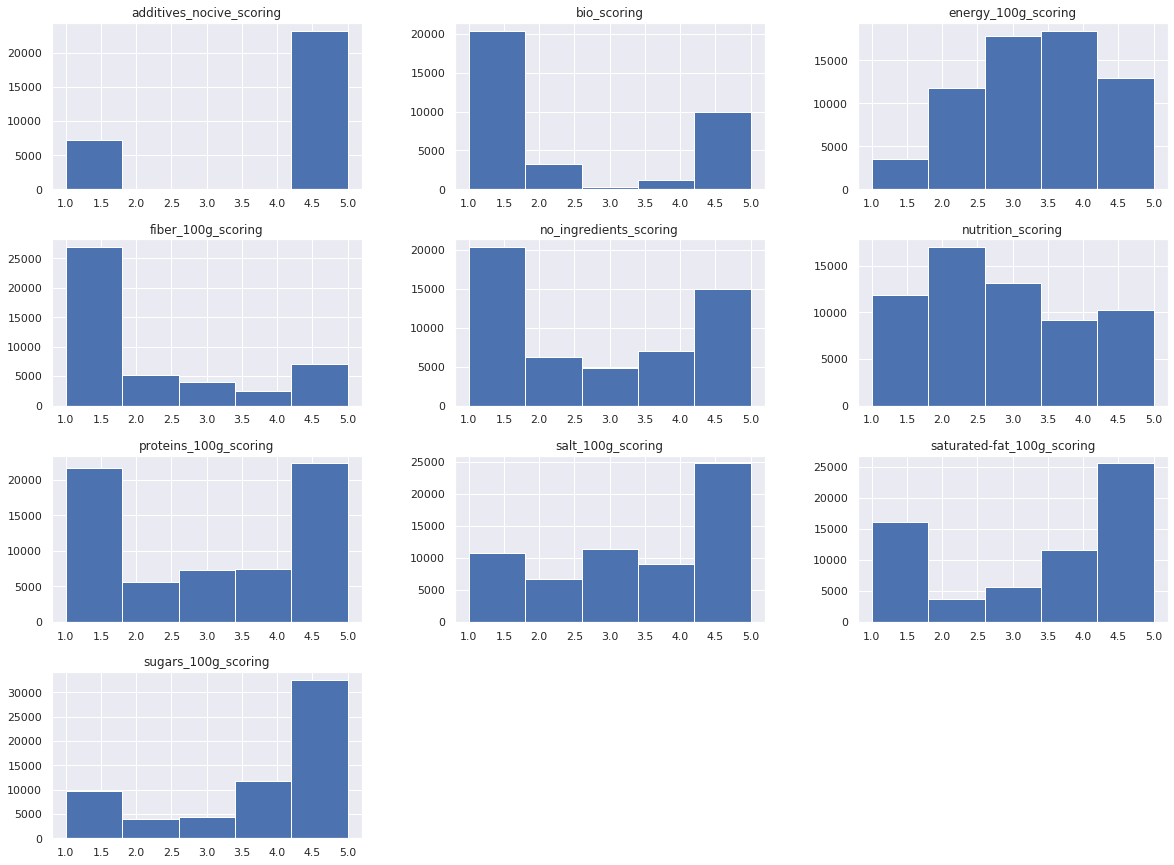

In [14]:
food[scoring_features].hist(bins=5, figsize=(20,15))

## Focus sur les additifs, graisses, sucre, bio, et nombre d'ingrédients :

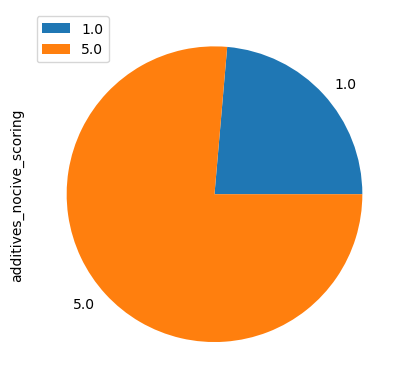

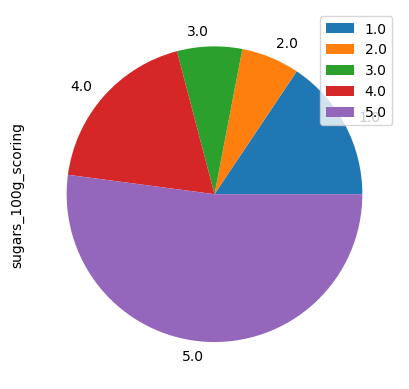

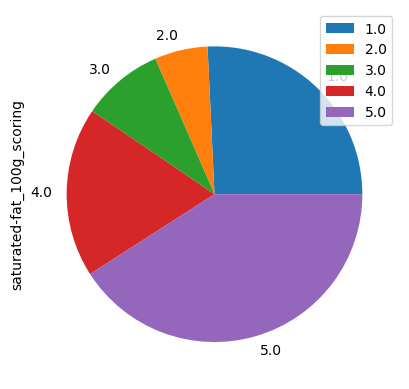

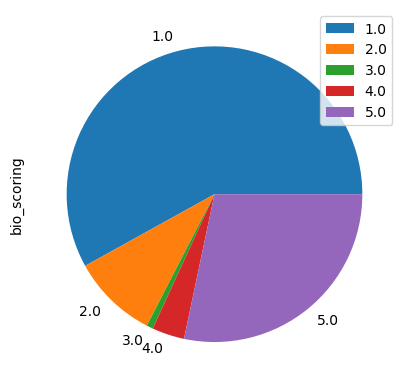

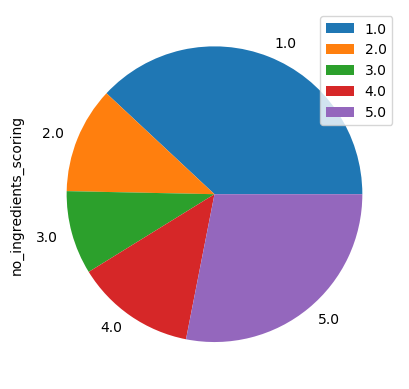

In [15]:
plt.style.use('default')
#print(plt.style.available)
#plt.style.use('seaborn-ticks')
#sns.set()
#current_palette = sns.color_palette('hls', 4)


for scoring_feature in ['additives_nocive_scoring', 'sugars_100g_scoring', 'saturated-fat_100g_scoring', 'bio_scoring', 'no_ingredients_scoring']:
        food.groupby(scoring_feature)[[scoring_feature]].count().plot.pie(subplots=True)
        #food.groupby(scoring_feature)[[scoring_feature]].count().plot.pie(subplots=True, colors=['#2c73d2', '#0081cf', '#0089ba', '#008e9b', '#008f7a'])
    
    

## Constats, parmi les produits qui contiennent les informations nécessaire au scoring :
* Près d'un quart des produits comportent au moins 1 additif considéré comme nocif
* La moitié des produits comportent plus de 4,5g de sucre /100 (ils sont moins bien notés que le meilleur scoring de sucre)
* Un quart des produits comportent plus de 7g de graisses saturées
* Plus d'un quart des produits sont du bio français

# Analyse univariée de features quantitatives

In [16]:
def log_convert(df, features_list_toconvert):
    features_list_converted = []
    for feature_name in features_list_toconvert:
        df[feature_name + '_log'] = np.log10(df[df[feature_name] > 0][feature_name])
        features_list_converted.append(feature_name + '_log')
        
    return(features_list_converted)

Text(0.5, 0.98, "Analyse univariée des quantités\nEchelle abscisses : proportion en grammes / 100g \nEchelle ordonnées : nombre d'aliments")

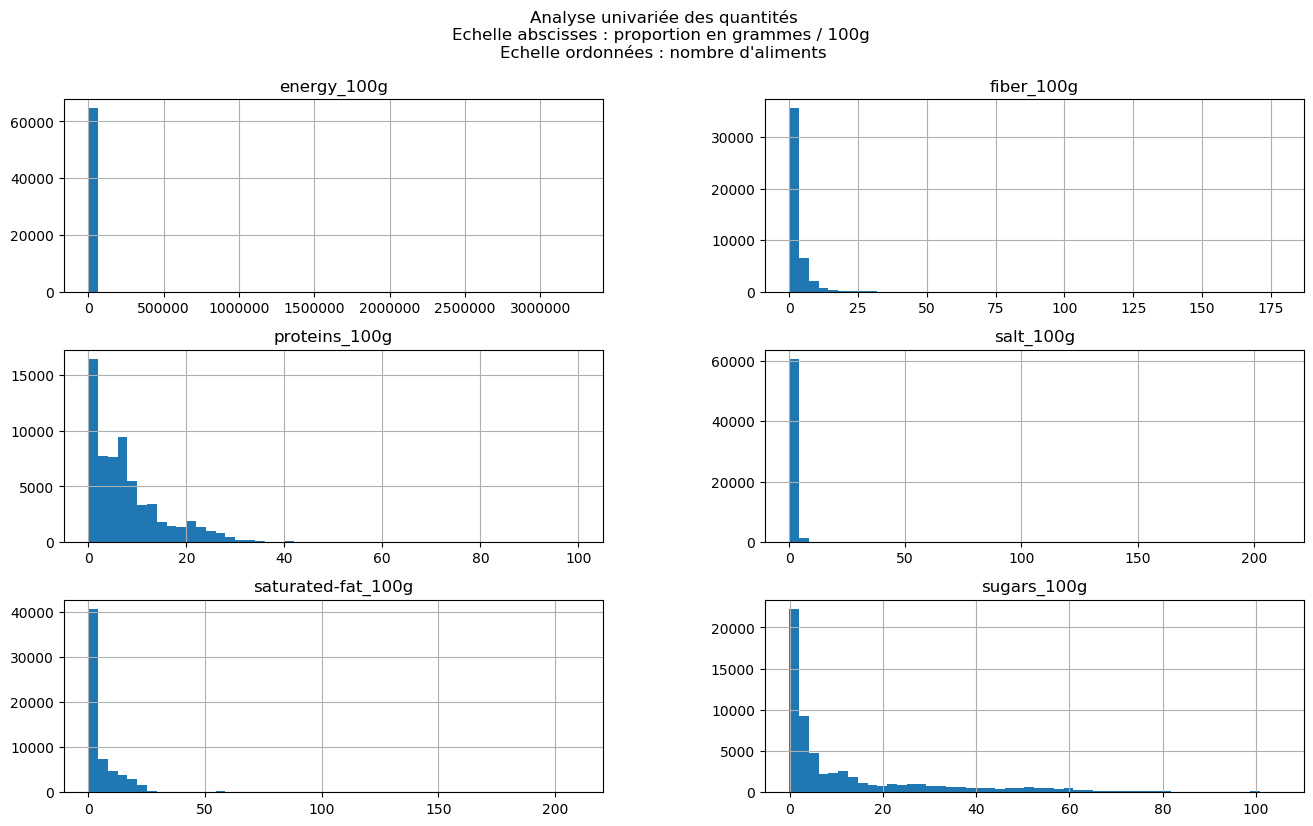

In [17]:
plt.rcParams["figure.figsize"] = [16,9]
food[quantity_features].hist(bins=50)
plt.suptitle("Analyse univariée des quantités\nEchelle abscisses : proportion en grammes / 100g \nEchelle ordonnées : nombre d'aliments")

## Analyse univariée logarithmique, pour mieux voir les répartitions

In [18]:
features_list_log = log_convert(food, quantity_features)

In [19]:
features_list_log

['energy_100g_log',
 'sugars_100g_log',
 'salt_100g_log',
 'saturated-fat_100g_log',
 'fiber_100g_log',
 'proteins_100g_log']

Text(0.5, 0.98, "Analyse univariée logarithmique des quantités\nEchelle des abscisses logarithmique : -3=0.001, ..., 1 = 10, 2=100, 3=1000, ... en g / 100g\nEchelle des ordonnées : nombre d'aliments")

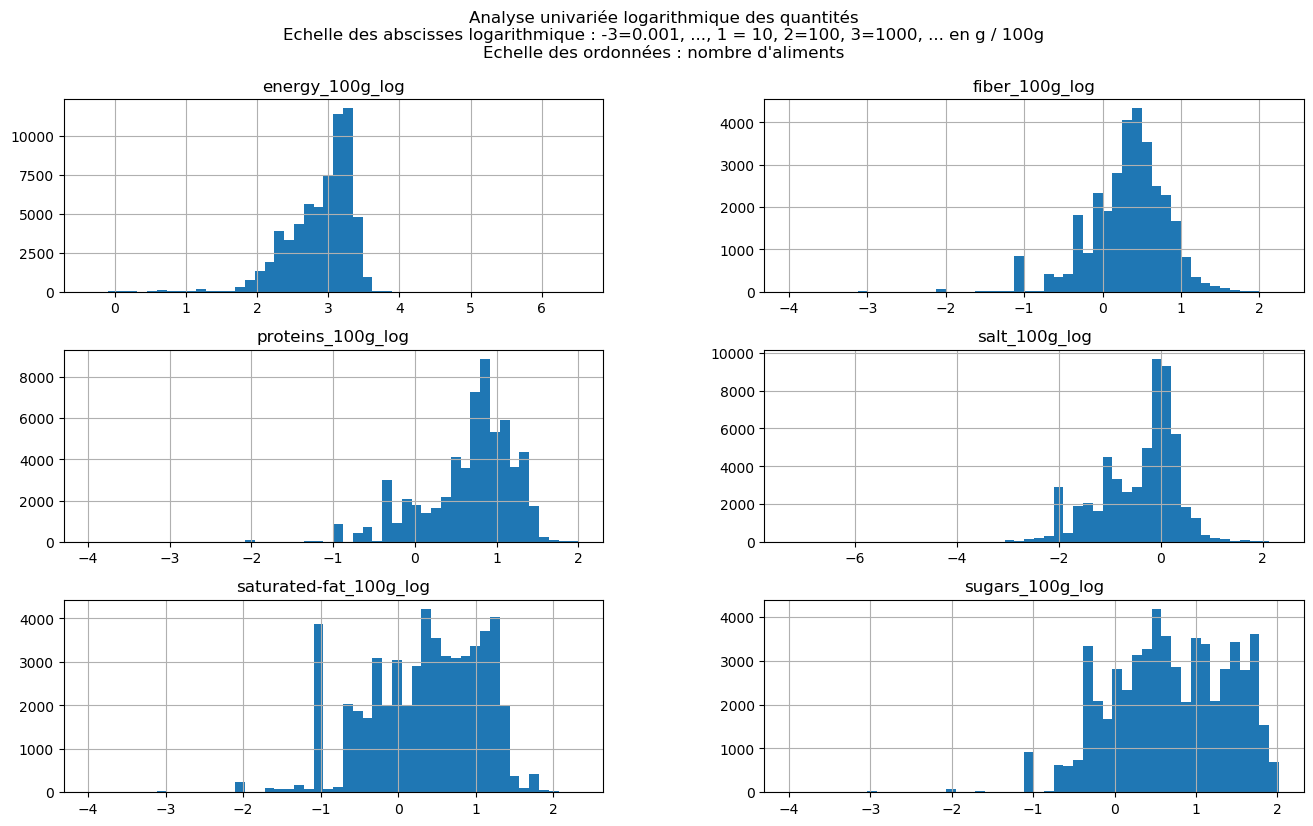

In [20]:
food[features_list_log].hist(bins=50)
plt.suptitle("Analyse univariée logarithmique des quantités\nEchelle des abscisses logarithmique : -3=0.001, ..., 1 = 10, 2=100, 3=1000, ... en g / 100g\nEchelle des ordonnées : nombre d'aliments")

In [21]:
food.describe()

last_modified_t   energy_100g   sugars_100g     salt_100g  \
count     9.844000e+04  6.459300e+04  62515.000000  62574.000000   
mean      1.468599e+09  1.171553e+03     13.432792      1.160535   
std       2.574637e+07  1.283590e+04     19.087618      4.309815   
min       1.333873e+09  0.000000e+00     -0.100000      0.000000   
25%       1.453544e+09  4.270000e+02      1.000000      0.080000   
50%       1.477596e+09  1.035000e+03      4.100000      0.558800   
75%       1.488821e+09  1.649000e+03     17.800000      1.244600   
max       1.492736e+09  3.251373e+06    105.000000    211.000000   

       saturated-fat_100g    fiber_100g  proteins_100g  \
count        62375.000000  45723.000000   64318.000000   
mean             5.423696      2.559271       7.754531   
std              8.531083      4.634788       7.887373   
min              0.000000      0.000000       0.000000   
25%              0.300000      0.000000       1.800000   
50%              2.000000      1.380000       6.000000   
75%              7.400000      3.200000      11.000000   
max            210.000000    178.000000     100.000000   

       ingredients_from_palm_oil_n   additives_n  nutrition_scoring  \
count                 53466.000000  53466.000000       61415.000000   
mean                      0.069839      1.856619           2.820874   
std                       0.258593      2.561405           1.352756   
min                       0.000000      0.000000           1.000000   
25%                       0.000000      0.000000           2.000000   
50%                       0.000000      1.000000           3.000000   
75%                       0.000000      3.000000           4.000000   
max                       2.000000     31.000000           5.000000   

       no_ingredients  no_ingredients_scoring  additives_nocive_scoring  \
count    53466.000000            53466.000000              30456.000000   
mean        10.421632                2.815696                  4.054768   
std         10.191214                1.690744                  1.699282   
min          1.000000                1.000000                  1.000000   
25%          3.000000                1.000000                  5.000000   
50%          7.000000                3.000000                  5.000000   
75%         15.000000                5.000000                  5.000000   
max        138.000000                5.000000                  5.000000   

       energy_100g_scoring  salt_100g_scoring  sugars_100g_scoring  \
count         64593.000000       62574.000000         62515.000000   
mean              3.393820           3.485170             3.854115   
std               1.155246           1.510884             1.493550   
min               1.000000           1.000000             1.000000   
25%               3.000000           2.000000             3.000000   
50%               3.000000           4.000000             5.000000   
75%               4.000000           5.000000             5.000000   
max               5.000000           5.000000             5.000000   

       saturated-fat_100g_scoring  fiber_100g_scoring  proteins_100g_scoring  \
count                62375.000000        45723.000000           64318.000000   
mean                     3.431086            2.074230               3.051012   
std                      1.650643            1.512065               1.711937   
min                      1.000000            1.000000               1.000000   
25%                      1.000000            1.000000               1.000000   
50%                      4.000000            1.000000               3.000000   
75%                      5.000000            3.000000               5.000000   
max                      5.000000            5.000000               5.000000   

        bio_scoring  energy_100g_log  sugars_100g_log  salt_100g_log  \
count  35139.000000     64256.000000     58236.000000   57182.000000   
mean       2.346766         2.891262         0.699488      

## Distribution des proportions d'énergie

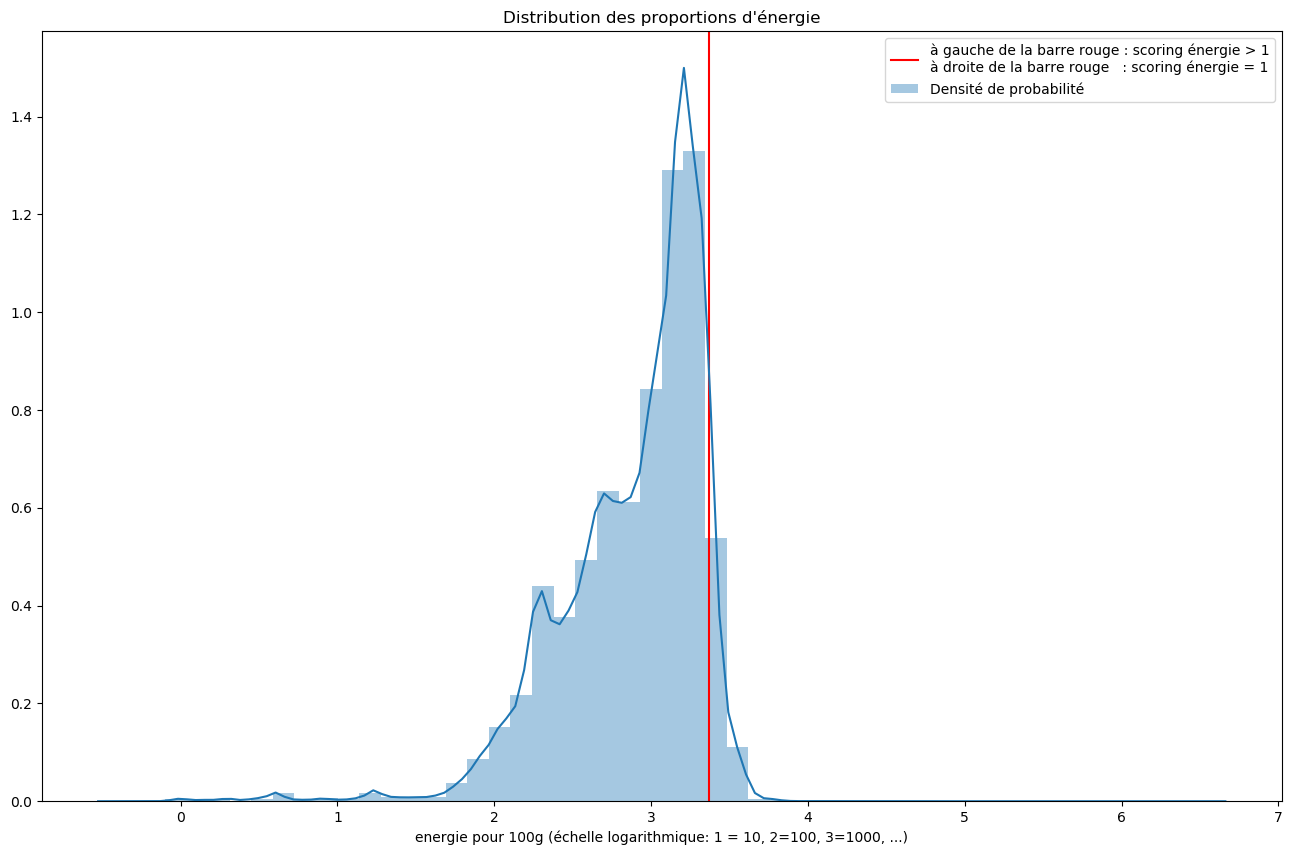

In [22]:
plt.figure(figsize=(16, 10))
plt.axvline(np.log10(2345), 0, 1, color='red', label='à gauche de la barre rouge : scoring énergie > 1\nà droite de la barre rouge   : scoring énergie = 1')
plt.legend()
plt.title("Distribution des proportions d'énergie")
sns.distplot(food[food['energy_100g_log'].notnull()]['energy_100g_log'], kde=True, label='Densité de probabilité', axlabel='energie pour 100g (échelle logarithmique: 1 = 10, 2=100, 3=1000, ...)')
plt.legend()

## Distribution des proportions de sel

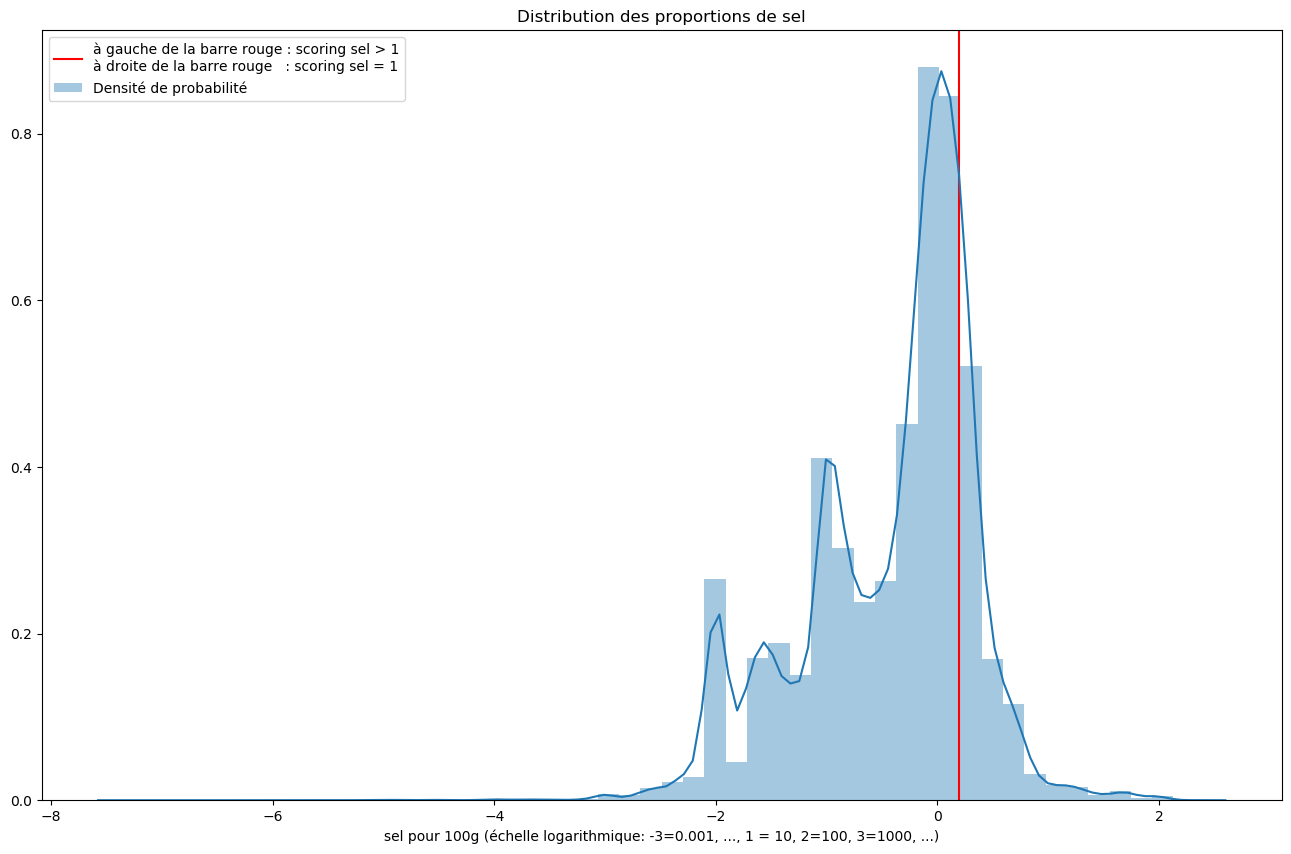

In [23]:
plt.figure(figsize=(16, 10))
plt.axvline(np.log10(1.575), 0, 1, color='red', label='à gauche de la barre rouge : scoring sel > 1\nà droite de la barre rouge   : scoring sel = 1')
plt.legend()
plt.title('Distribution des proportions de sel')

sns.distplot(food[food['salt_100g_log'].notnull()]['salt_100g_log'], kde=True, label='Densité de probabilité', axlabel='sel pour 100g (échelle logarithmique: -3=0.001, ..., 1 = 10, 2=100, 3=1000, ...)')
plt.legend()

## Distribution des proportions de sucre

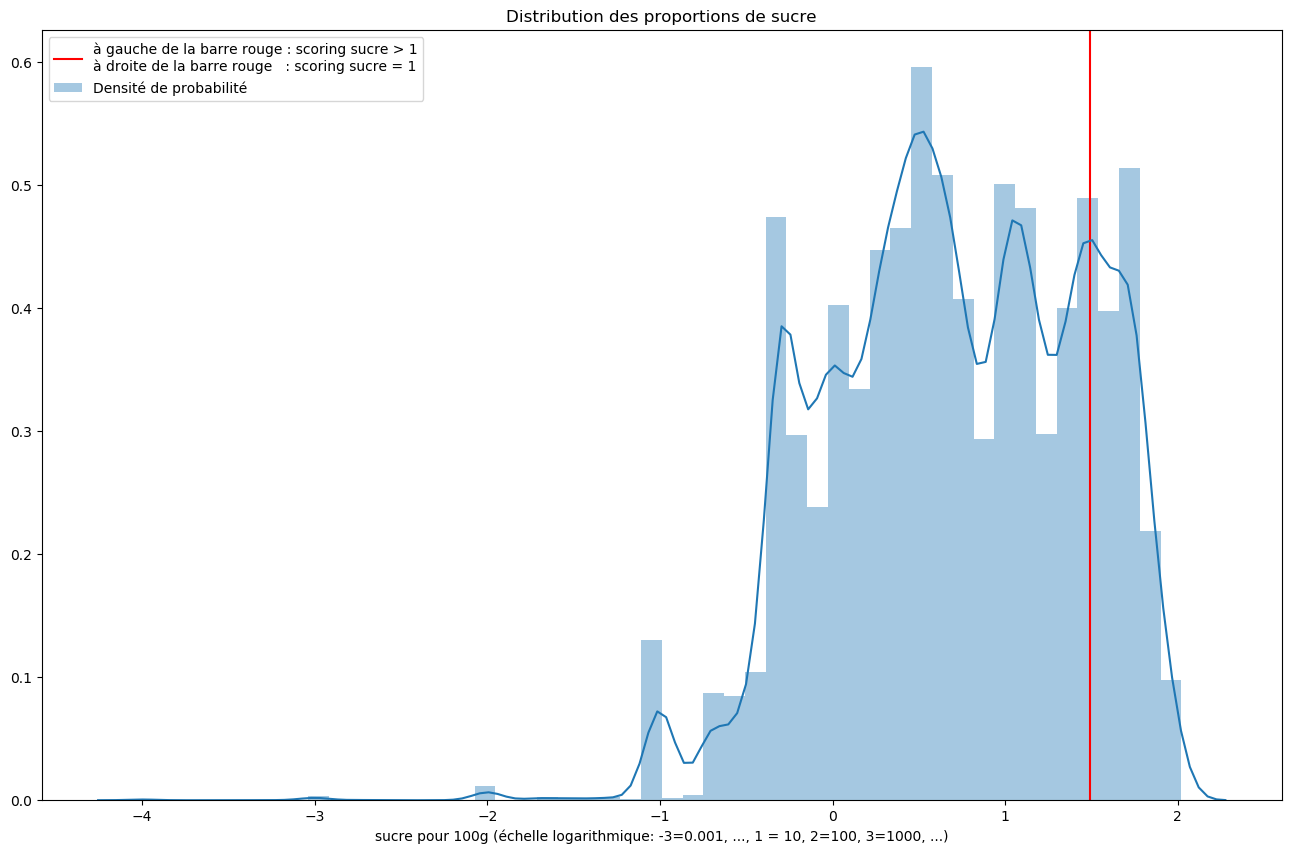

In [24]:
plt.figure(figsize=(16, 10))
plt.axvline(np.log10(31), 0, 1, color='red', label='à gauche de la barre rouge : scoring sucre > 1\nà droite de la barre rouge   : scoring sucre = 1')
plt.legend()
plt.title('Distribution des proportions de sucre')
sns.distplot(food[food['sugars_100g_log'].notnull()]['sugars_100g_log'], kde=True, label='Densité de probabilité', axlabel='sucre pour 100g (échelle logarithmique: -3=0.001, ..., 1 = 10, 2=100, 3=1000, ...)')
plt.legend()

# Analyse multivariée : Corrélation entre les données

In [25]:
corr_matrix = food.corr()

In [26]:
corr_matrix[quantity_features].loc[quantity_features]

energy_100g  sugars_100g  salt_100g  saturated-fat_100g  \
energy_100g            1.000000     0.017048  -0.002525            0.031784   
sugars_100g            0.017048     1.000000  -0.085952            0.080119   
salt_100g             -0.002525    -0.085952   1.000000            0.008326   
saturated-fat_100g     0.031784     0.080119   0.008326            1.000000   
fiber_100g             0.023485     0.036147   0.003046            0.019374   
proteins_100g          0.019534    -0.245816   0.092610            0.143507   

                    fiber_100g  proteins_100g  
energy_100g           0.023485       0.019534  
sugars_100g           0.036147      -0.245816  
salt_100g             0.003046       0.092610  
saturated-fat_100g    0.019374       0.143507  
fiber_100g            1.000000       0.197523  
proteins_100g         0.197523       1.000000

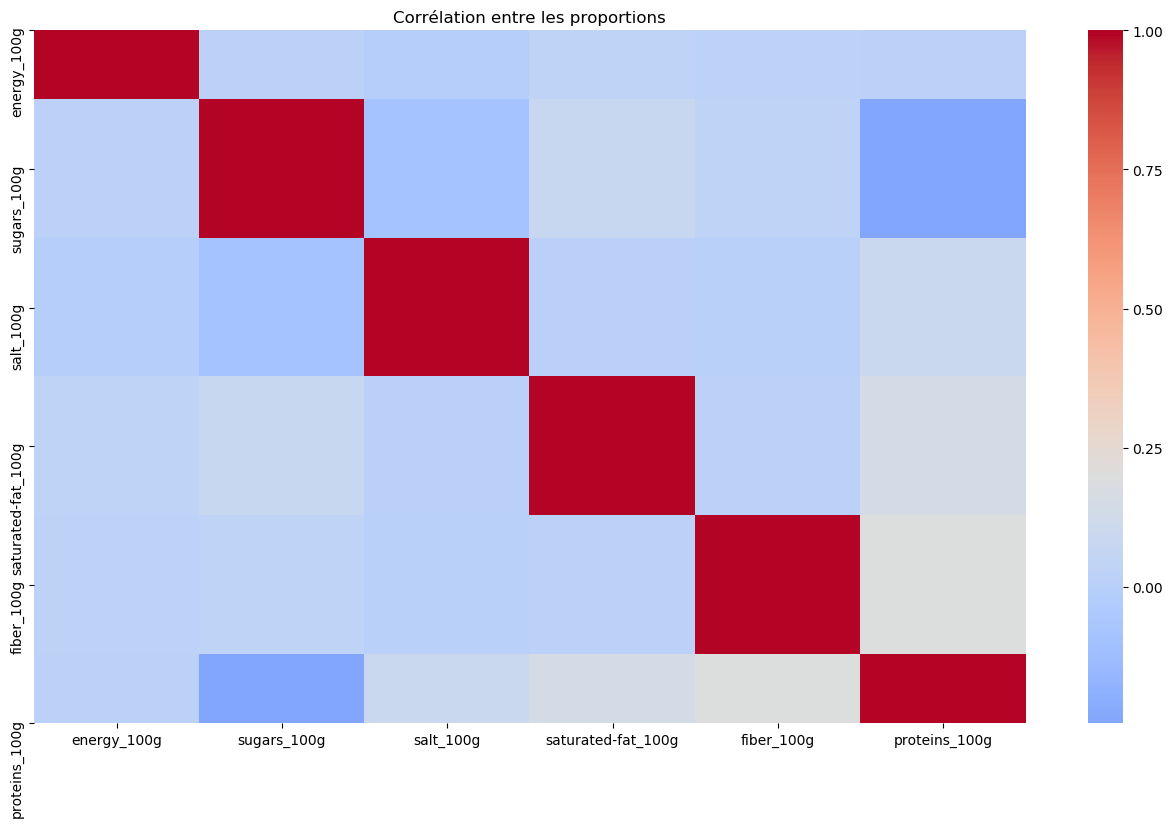

In [27]:
plt.title('Corrélation entre les proportions')
sns.heatmap(corr_matrix[quantity_features].loc[quantity_features], 
        xticklabels=corr_matrix[quantity_features].loc[quantity_features].columns,
        yticklabels=corr_matrix[quantity_features].loc[quantity_features].columns, cmap='coolwarm' ,center=0.20)

In [28]:
corr_matrix[scoring_features].loc[scoring_features]

nutrition_scoring  bio_scoring  \
nutrition_scoring                    1.000000     0.123408   
bio_scoring                          0.123408     1.000000   
no_ingredients_scoring               0.226102     0.165324   
additives_nocive_scoring             0.015085     0.117165   
energy_100g_scoring                  0.529364    -0.055108   
salt_100g_scoring                    0.255817     0.207577   
sugars_100g_scoring                  0.439241    -0.054466   
saturated-fat_100g_scoring           0.659987     0.079399   
fiber_100g_scoring                   0.167601     0.170695   
proteins_100g_scoring               -0.059106    -0.026112   

                            no_ingredients_scoring  additives_nocive_scoring  \
nutrition_scoring                         0.226102                  0.015085   
bio_scoring                               0.165324                  0.117165   
no_ingredients_scoring                    1.000000                  0.130712   
additives_nocive_scoring                  0.130712                  1.000000   
energy_100g_scoring                       0.099992                 -0.081270   
salt_100g_scoring                         0.259121                  0.278058   
sugars_100g_scoring                       0.158221                 -0.242503   
saturated-fat_100g_scoring                0.165564                 -0.045346   
fiber_100g_scoring                        0.043054                  0.099225   
proteins_100g_scoring                    -0.057208                 -0.217596   

                            energy_100g_scoring  salt_100g_scoring  \
nutrition_scoring                      0.529364           0.255817   
bio_scoring                           -0.055108           0.207577   
no_ingredients_scoring                 0.099992           0.259121   
additives_nocive_scoring              -0.081270           0.278058   
energy_100g_scoring                    1.000000           0.123336   
salt_100g_scoring                      0.123336           1.000000   
sugars_100g_scoring                    0.361267          -0.349230   
saturated-fat_100g_scoring             0.631874           0.196985   
fiber_100g_scoring                    -0.351808           0.019582   
proteins_100g_scoring                 -0.384084          -0.412878   

                            sugars_100g_scoring  saturated-fat_100g_scoring  \
nutrition_scoring                      0.439241                    0.659987   
bio_scoring                           -0.054466                    0.079399   
no_ingredients_scoring                 0.158221                    0.165564   
additives_nocive_scoring              -0.242503                   -0.045346   
energy_100g_scoring                    0.361267                    0.631874   
salt_100g_scoring                     -0.349230                    0.196985   
sugars_100g_scoring                    1.000000                    0.186794   
saturated-fat_100g_scoring             0.186794                    1.000000   
fiber_100g_scoring                    -0.116794                   -0.026331   
proteins_100g_scoring                  0.170938                   -0.317821   

                            fiber_100g_scoring  proteins_100g_scoring  
nutrition_scoring                     0.167601              -0.059106  
bio_scoring                           0.170695              -0.026112  
no_ingredients_scoring                0.043054              -0.057208  
additives_nocive_scoring              0.099225              -0.217596  
energy_100g_scoring                  -0.351808              -0.384084  
salt_100g_scoring                     0.019582              -0.412878  
sugars_100g_scoring                  -0.116794               0.170938  
saturated-fat_100g_scoring           -0.026331              -0.317821  
fiber_100g_scoring                    1.000000               0.323441  
proteins_100g_scoring                 0.323441               1.000000

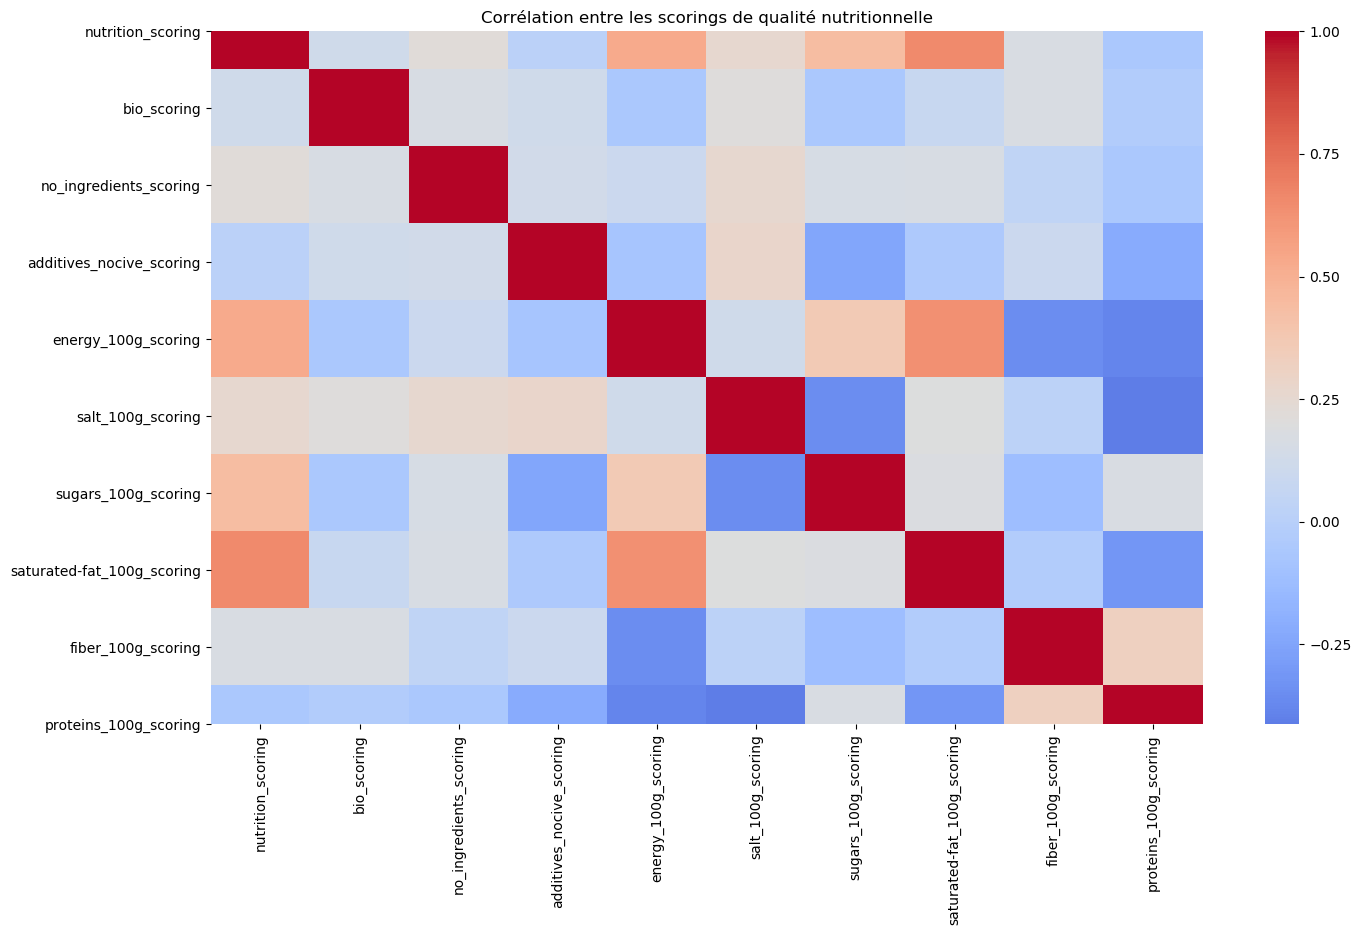

In [29]:
plt.title('Corrélation entre les scorings de qualité nutritionnelle')
sns.heatmap(corr_matrix[scoring_features].loc[scoring_features], 
        xticklabels=corr_matrix[scoring_features].loc[scoring_features].columns,
        yticklabels=corr_matrix[scoring_features].loc[scoring_features].columns, cmap='coolwarm', center=0.20)

### On voit que le scoring nutrition est bien corrélé aux variables sur lesquels porte ce scoring : graisses, sucres, énergie, sel
### no_ingredients et bio sont également corrélés aux autres variables (couleur bleu clair)

## Test khi 2 entre le scoring de nutrition et bio

In [30]:
X = "bio_scoring"
Y = "nutrition_scoring"
data = food

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

nutrition_scoring   1.0   2.0   3.0   4.0   5.0  Total
bio_scoring                                           
1.0                2708  4330  3483  2391  2725  15637
2.0                 440   658   780   470   316   2664
3.0                  16    45    32    24    51    168
4.0                 119   229   132   110   181    771
5.0                1075  1816  1576  1487  2287   8241
Total              4358  7078  6003  4482  5560  27481

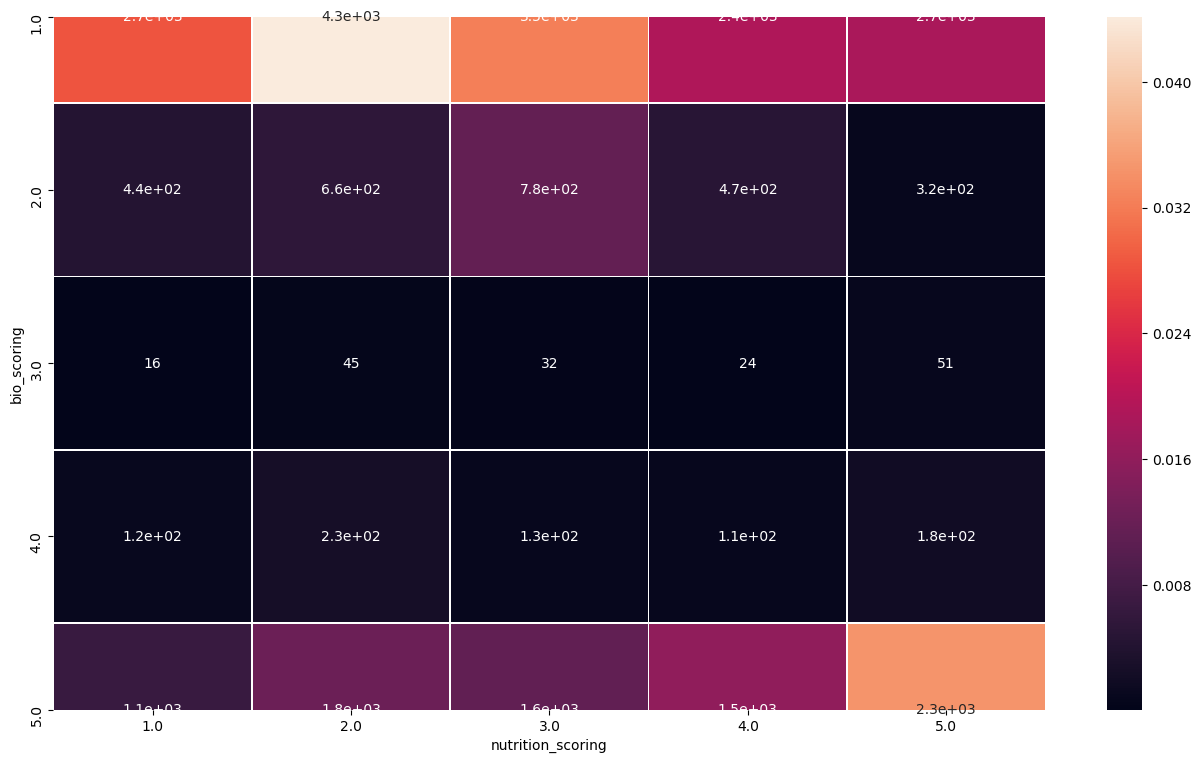

In [31]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n

sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], linewidths=.5)
plt.show()

## Diagramme de dispersion des quantités

Text(0.5, 0.98, 'Diagramme de dispersion des quantités')

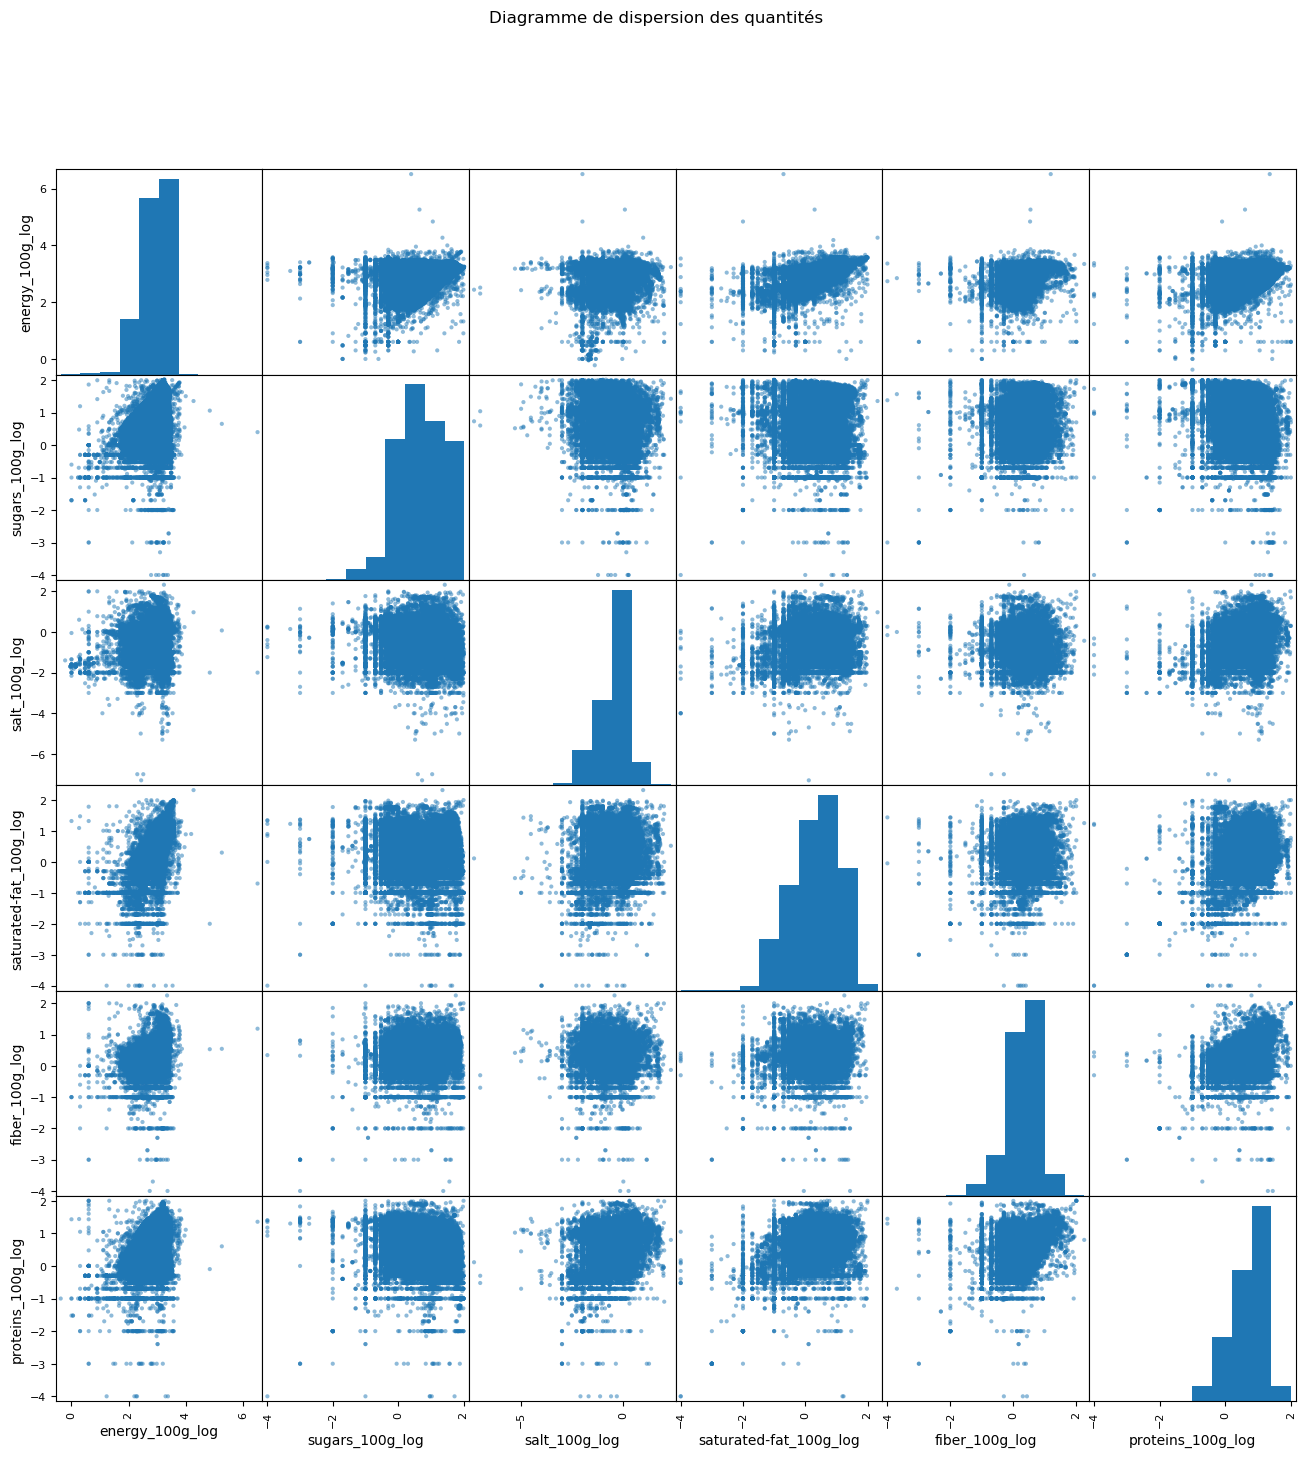

In [32]:
scatter_matrix(food[features_list_log], figsize=(16,16))
plt.suptitle('Diagramme de dispersion des quantités')

# Réduction dimensionnelle

In [33]:
from sklearn import decomposition
from sklearn import preprocessing

# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=2)

# import de l'échantillon
data = food

# selection des colonnes à prendre en compte dans l'ACP
data_pca = food[['nutrition_scoring', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring']]

data_pca = data_pca.dropna()

X = data_pca.values
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Reduce the data, output is ndarray
reduced_data = pca.fit_transform(X_scaled)

# Inspect shape of the `reduced_data`
print(reduced_data.shape)

# print out the reduced data
print(reduced_data)

(8157, 2)
[[ 1.09517571  0.84077433]
 [ 0.75214046  0.09624672]
 [ 2.69990706  0.96754955]
 ...
 [ 1.24321778  0.1969745 ]
 [-1.45885812  0.40773526]
 [-1.64721864  0.15928317]]


## Représentation des produits en 2 dimensions avec coloration nutrition score

## Cercle des corrélations et réduction de dimensionalité

In [34]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram

def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(16,16))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

def plot_dendrogram(Z, names):
    plt.figure(figsize=(10,25))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('distance')
    dendrogram(
        Z,
        labels = names,
        orientation = "left",
    )
plt.show()

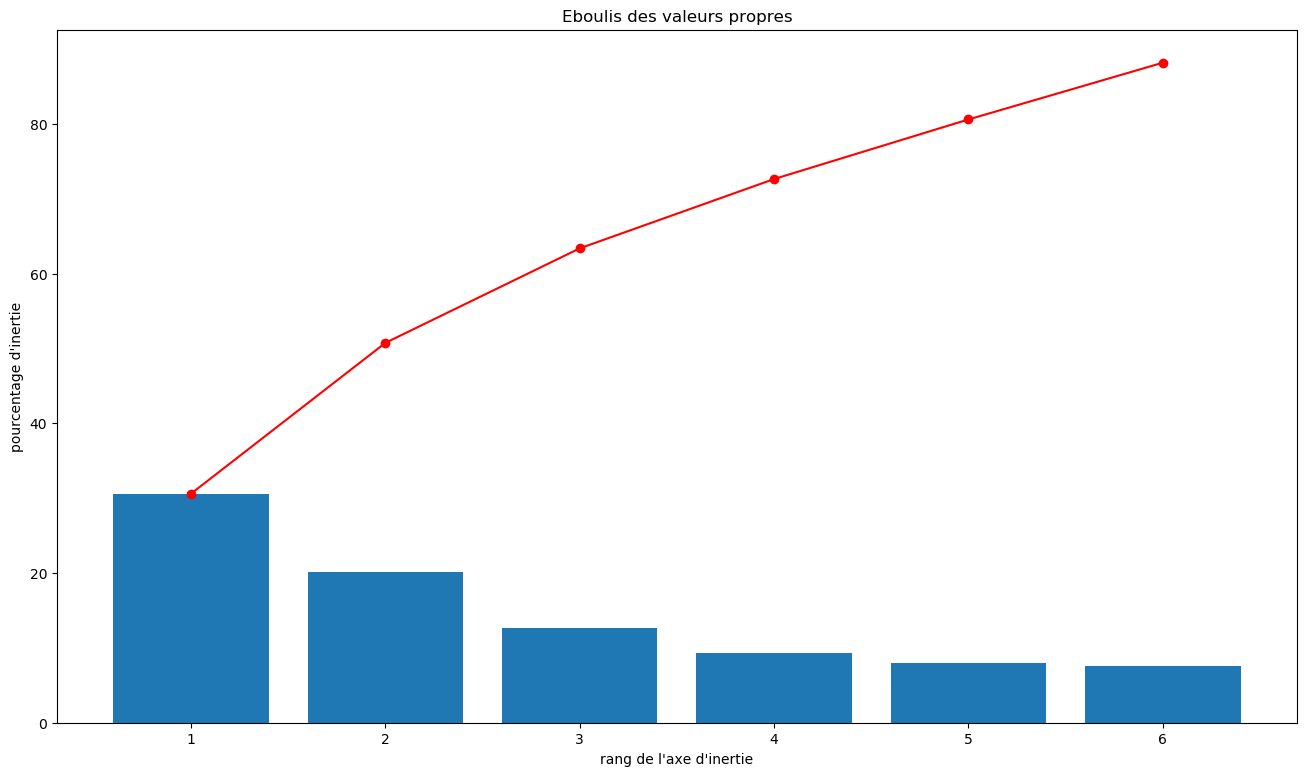

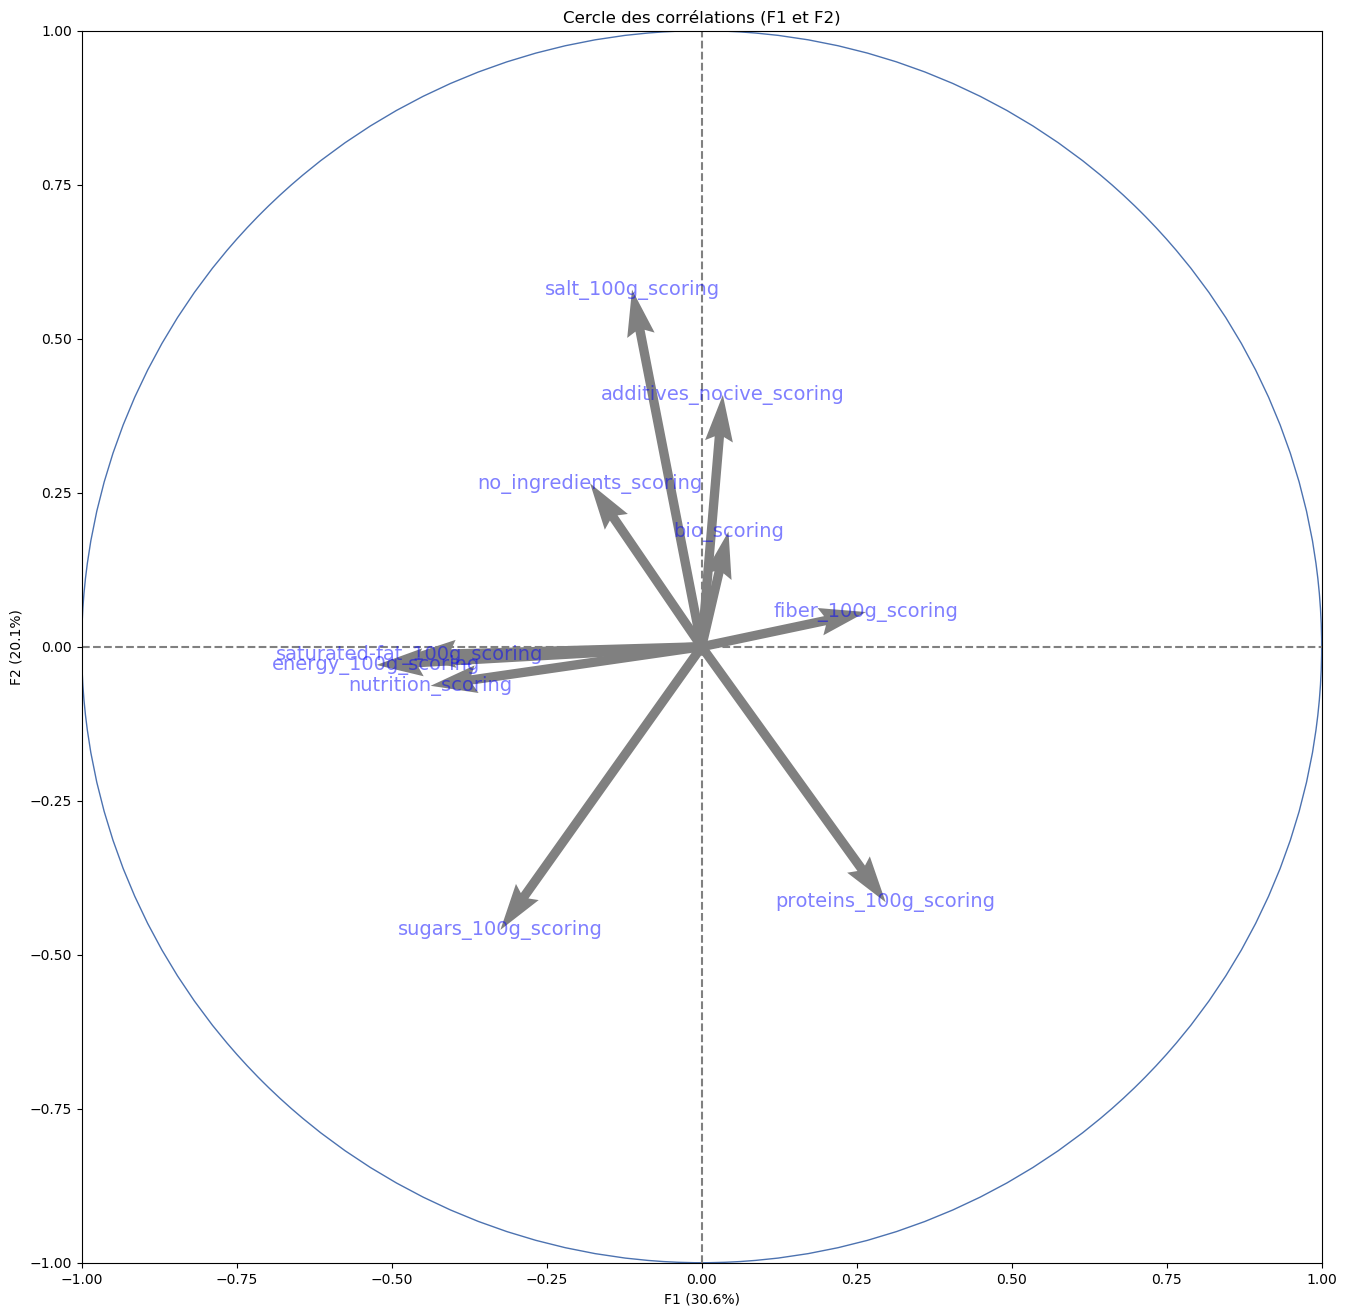

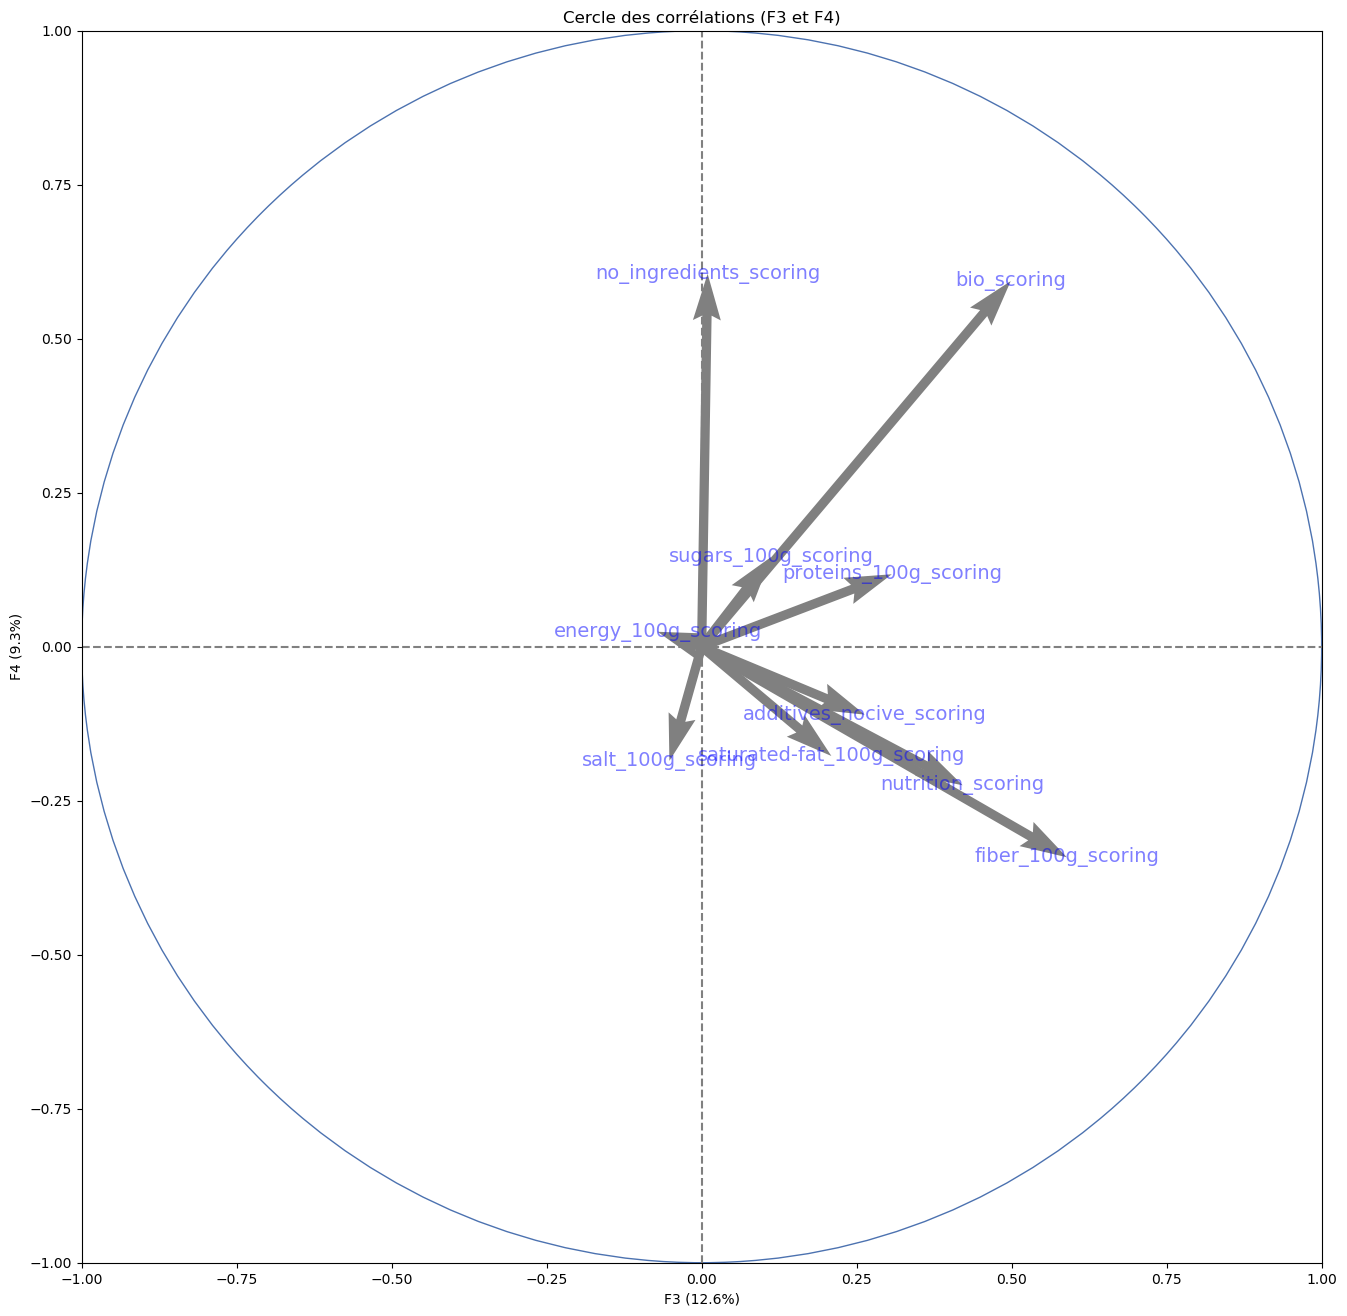

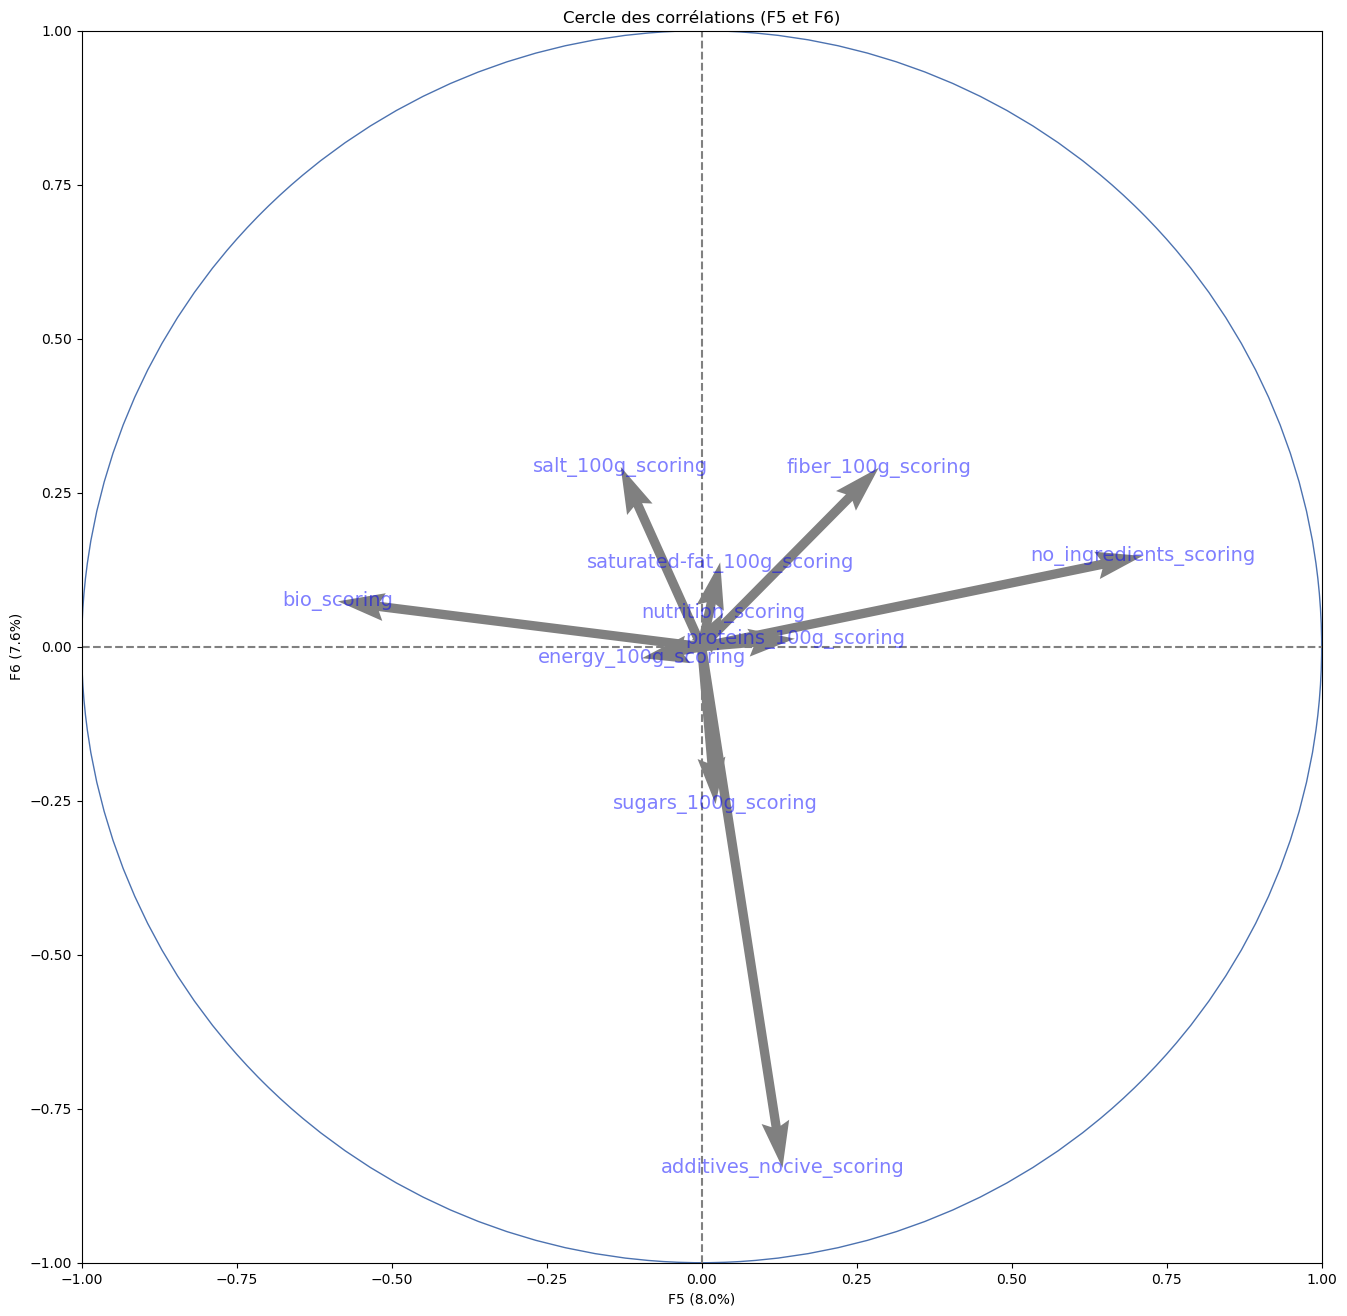

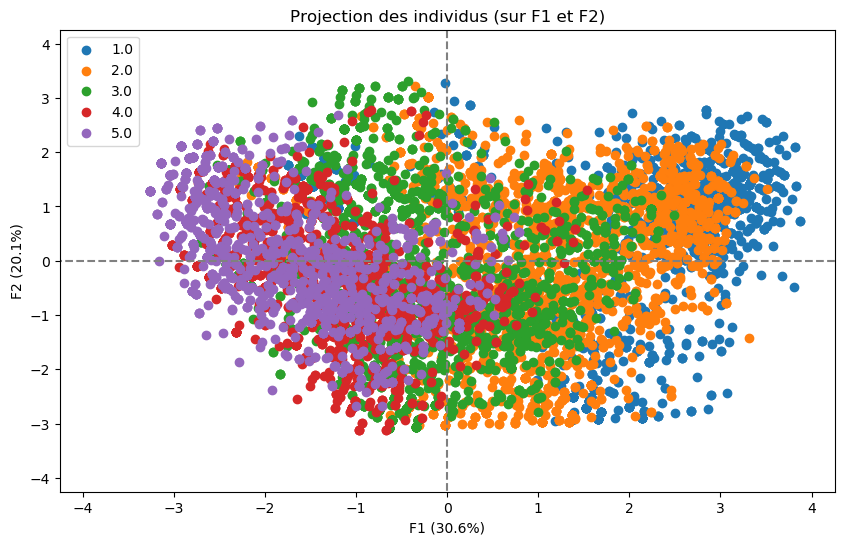

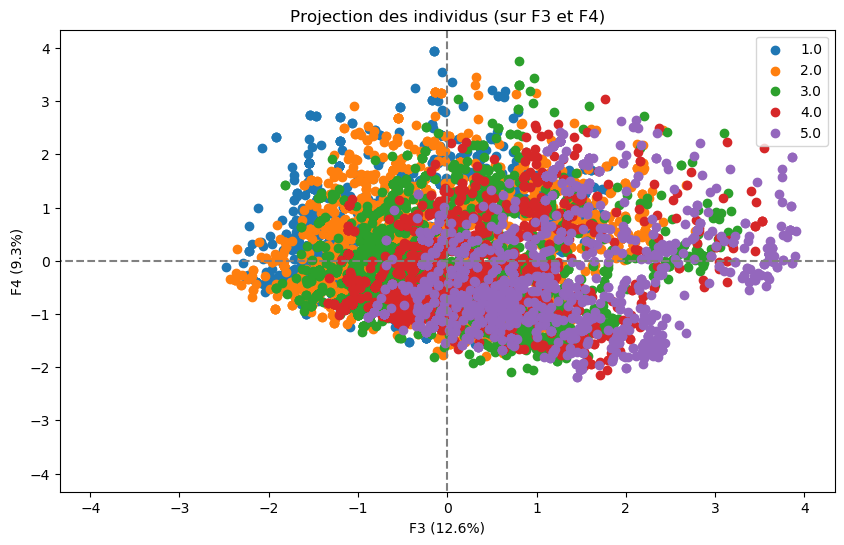

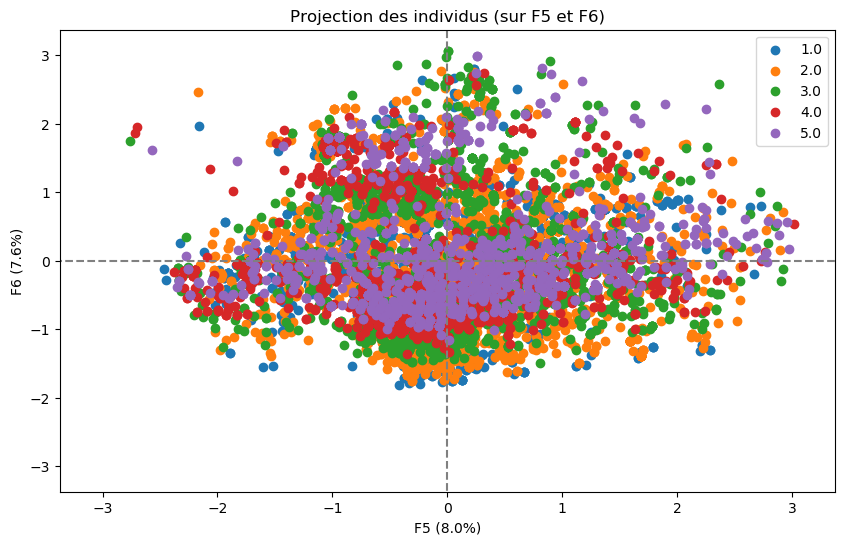

In [35]:

from sklearn import decomposition
from sklearn import preprocessing

# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=2)

# choix du nombre de composantes à calculer
n_comp = 6

# import de l'échantillon
data = food

# selection des colonnes à prendre en compte dans l'ACP
data_pca = food[['nutrition_scoring', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring']]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
data_pca = data_pca.dropna()

X = data_pca.values
#names = data["idCours"] # ou data.index pour avoir les intitulés

#features = data.columns
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
#plt.figure(figsize=(16,10))
plt.rcParams["figure.figsize"] = [16,9]
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))


# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], illustrative_var=data_pca[['nutrition_scoring']].values[:,0])


plt.show()



In [36]:
pcs[0]

array([-0.43722506, -0.17992925,  0.03420172, -0.52448591, -0.11230503,
       -0.32460514, -0.47118322,  0.26501861,  0.29681772,  0.04329341])

In [37]:
data_pca

nutrition_scoring  no_ingredients_scoring  additives_nocive_scoring  \
24                   2.0                     1.0                       5.0   
26                   2.0                     1.0                       1.0   
28                   1.0                     1.0                       5.0   
29                   1.0                     1.0                       1.0   
54                   2.0                     3.0                       5.0   
...                  ...                     ...                       ...   
98354                2.0                     2.0                       5.0   
98360                1.0                     1.0                       5.0   
98375                3.0                     3.0                       5.0   
98395                3.0                     5.0                       1.0   
98405                4.0                     4.0                       1.0   

       energy_100g_scoring  salt_100g_scoring  sugars_100g_scoring  \
24                     2.0                4.0                  2.0   
26                     3.0                4.0                  1.0   
28                     2.0                4.0                  1.0   
29                     2.0                3.0                  1.0   
54                     3.0                5.0                  1.0   
...                    ...                ...                  ...   
98354                  5.0                1.0                  4.0   
98360                  3.0                1.0                  1.0   
98375                  3.0                3.0                  4.0   
98395                  3.0                5.0                  5.0   
98405                  3.0                5.0                  5.0   

       saturated-fat_100g_scoring  fiber_100g_scoring  proteins_100g_scoring  \
24                            4.0                 1.0                    3.0   
26                            4.0                 1.0                    3.0   
28                            1.0                 1.0                    4.0   
29                            1.0                 2.0                    5.0   
54                            5.0                 1.0                    1.0   
...                           ...                 ...                    ...   
98354                         5.0                 1.0                    2.0   
98360                         5.0                 1.0                    1.0   
98375                         1.0                 5.0                    3.0   
98395                         4.0                 1.0                    1.0   
98405                         4.0                 1.0                    1.0   

       bio_scoring  
24             2.0  
26             2.0  
28             2.0  
29             2.0  
54             1.0  
...            ...  
98354          1.0  
98360          1.0  
98375          1.0  
98395          1.0  
98405          1.0  

[8157 rows x 10 columns]

# Analyse d'échantillons d'ingrédients obtenus après application des scorings

### On définit un nouveau dataframe qui contiendra uniquement les features de scoring les plus importantes, et qui n'ont pas de valeurs NA :
Les features de scoring sur les proportions/100g ont été enlevées car elles sont couvertes par le nutrition score  

In [38]:
food_scoring_important = food[['code', 'product_name', 'image_url', 'main_category_fr', 'nutrition_scoring', 'no_ingredients_scoring', 'additives_nocive_scoring', 'bio_scoring']].dropna()

In [39]:
food_scoring_important.shape

(10136, 8)

## Si on ne conserve que les aliments ayant tous les scoring nutrition, additifs, bio, nombre d'ingrédients, supérieurs à 5 :

In [40]:
food_scoring_important = food[(food['nutrition_scoring'] == 5) & (food['additives_nocive_scoring'] == 5) & (food['bio_scoring'] == 5) & (food['no_ingredients_scoring'] == 5)]

### Catégorie d'aliments à proposer dans ce cas :

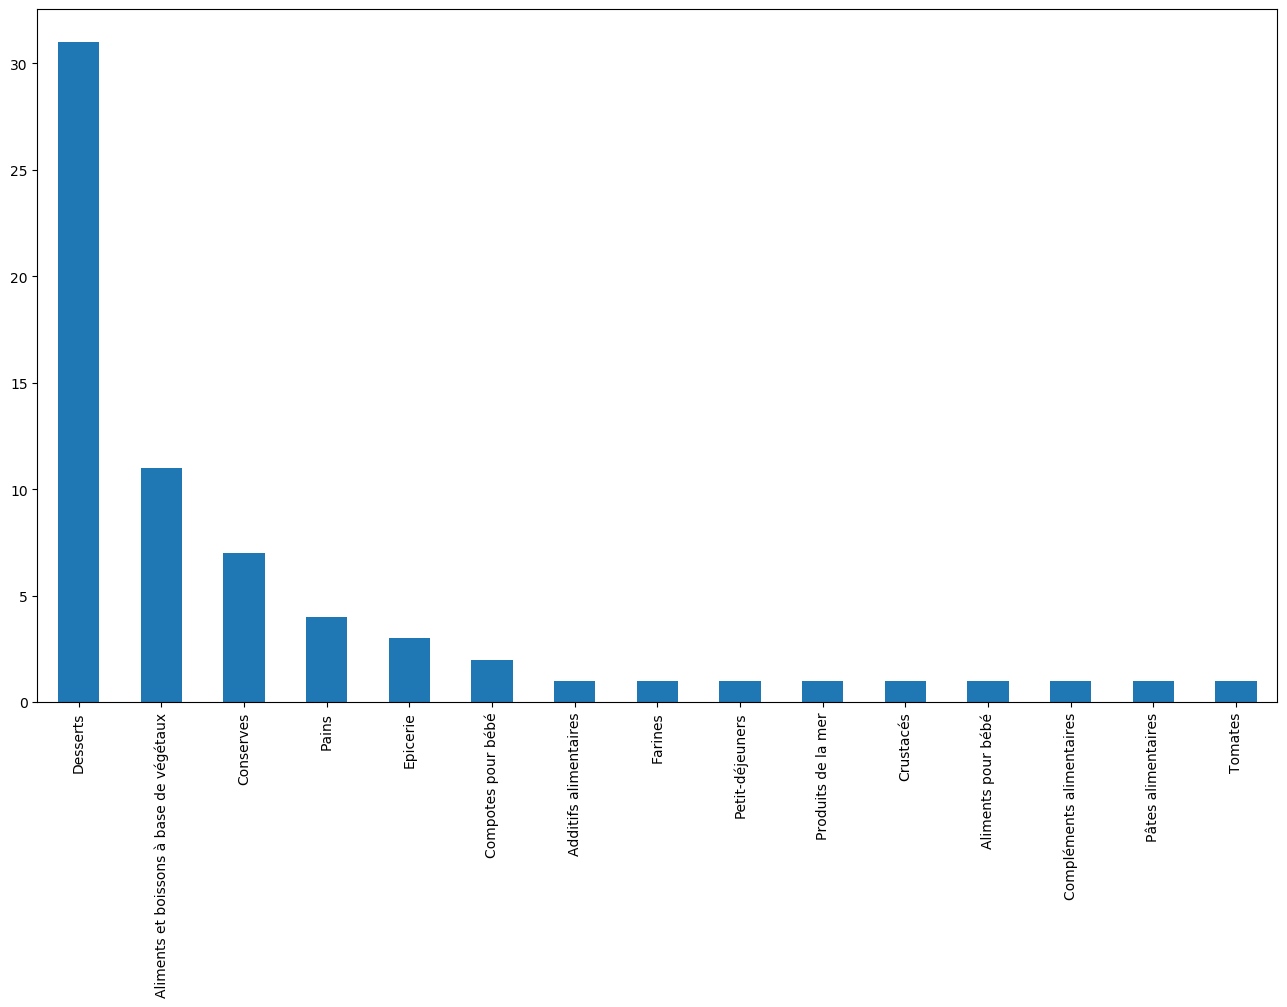

In [41]:
food_scoring_important['main_category_fr'].value_counts().plot(kind='bar')

### => La variété des ingrédients disponibles est un peu faible

## Si on ne conserve que les aliments ayant nutrition scoring à 5 et bio scoring à 5, sans tenir compte du scoring sur le nombre d'ingrédients  :
NB : puisque le scoring bio à 5 implique dene pas avoir d'additif, on n'inclut pas les additifs nocifs dans ce cas

In [42]:
food_scoring_important = food[(food_scoring_important['nutrition_scoring'] == 5) &  (food['bio_scoring'] == 5)]

### Catégorie d'aliments à proposer dans ce cas :

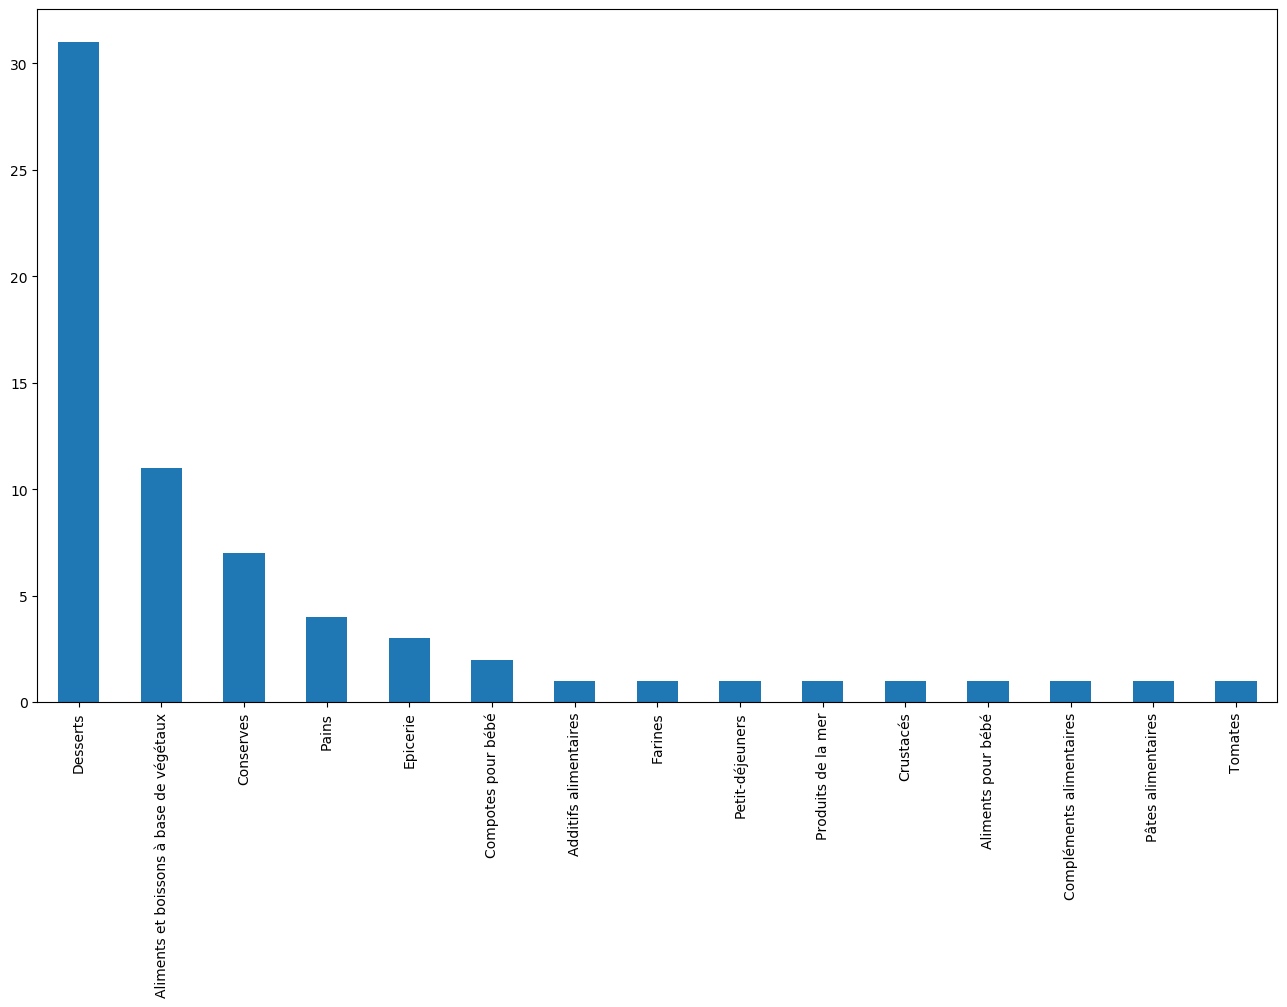

In [43]:
food_scoring_important['main_category_fr'].value_counts().plot(kind='bar')

### => La variété des ingrédients disponibles reste faible

## Si on ne conserve que les aliments ayant nutrition scoring >= 5, avec un scoring bio >= 2  (ce qui signifie au minimum des produits français, qu'ils soient bio ou non), et un scoring sur le nombre d'ingrédients >= 2 (c'est à dire pas plus de 5 ingrédients pour éviter les produits transformés) :

In [44]:
food_scoring_important = food[(food['nutrition_scoring'] >= 5) & (food['bio_scoring'] >= 2)& (food['no_ingredients_scoring'] >= 4)]

### Catégorie d'aliments à proposer dans ce cas :

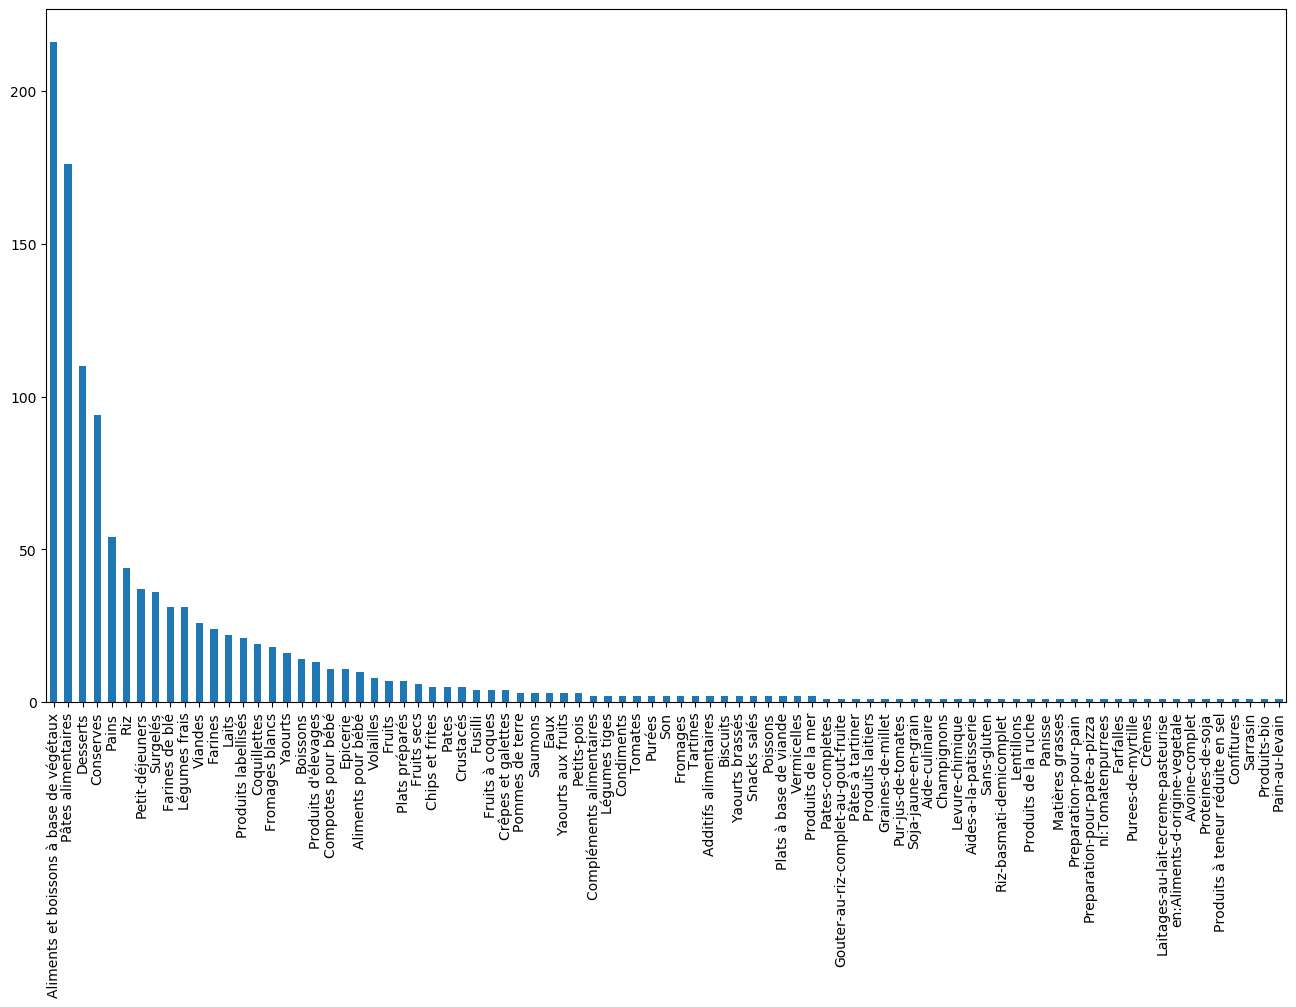

In [45]:
food_scoring_important['main_category_fr'].value_counts().plot(kind='bar')

In [46]:
food_scoring_important['main_category_fr'].value_counts()[:30]

Aliments et boissons à base de végétaux    216
Pâtes alimentaires                         176
Desserts                                   110
Conserves                                   94
Pains                                       54
Riz                                         44
Petit-déjeuners                             37
Surgelés                                    36
Farines de blé                              31
Légumes frais                               31
Viandes                                     26
Farines                                     24
Laits                                       22
Produits labellisés                         21
Coquillettes                                19
Fromages blancs                             18
Yaourts                                     16
Boissons                                    14
Produits d'élevages                         13
Compotes pour bébé                          11
Epicerie                                    11
Aliments pour

### => La variété des ingrédients disponibles est satisfaisante

# Affichage de fiches scoring des bons ingrédients, avec images

In [47]:
import plotly.express as px

#from IPython.display import HTML, display
from IPython.display import Image

'''
Cette fonction nécessite une variable globale "scoring_features"
qui contient la liste des noms de colonnes du dataframe df à afficher dans le radar plot
'''
def display_products_radar_image(df):
    max_products_display = 100
    cnt = 0
    
    for i, j in df.iterrows(): 
        if (cnt > max_products_display):
            print('Max products display reached')
            break
            
        radar_values = df.loc[[i]][scoring_features].to_numpy()
        #print(radar_values.tolist()[0])
        radar_values[np.isnan(radar_values)] = 0
        #print(radar_values.tolist()[0])
        
        df_radius = pd.DataFrame(dict(
            r = radar_values.tolist()[0],
            theta = scoring_features))

        fig = px.line_polar(df_radius, r='r', theta='theta', line_close=True, width=600, height=400, title=df.loc[i]['product_name'])
        
        plt.figure(figsize=(10, 10))
        
        print('Produit: ')
        fig.show()
                
        #print('Image du produit: ')  
        image_url = df.loc[i]['image_url']
                        
        if (type(image_url) == str):
            display(Image(df.loc[i]['image_url'], width=100))
                        
        print('\n\n')
        cnt +=1         




2 bons produits dans la catégorie Aliments et boissons à base de végétaux
Produit: 





Produit: 


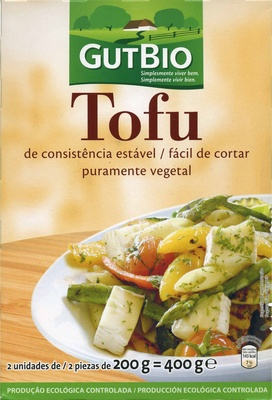




2 bons produits dans la catégorie Pâtes alimentaires
Produit: 


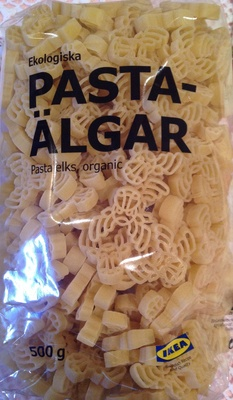




Produit: 


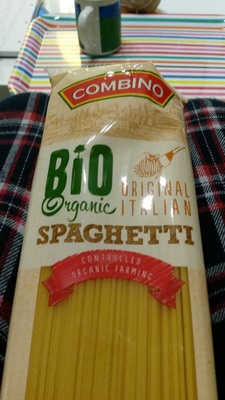




2 bons produits dans la catégorie Desserts
Produit: 





Produit: 


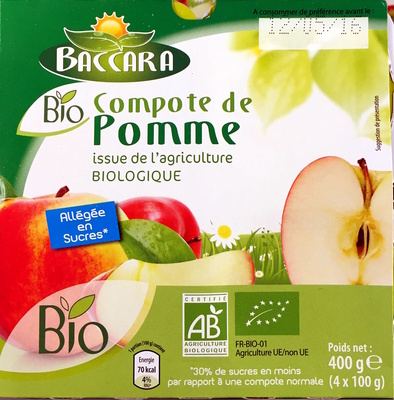




2 bons produits dans la catégorie Conserves
Produit: 


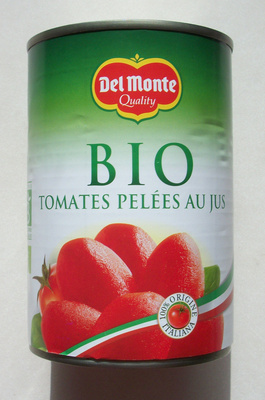




Produit: 





2 bons produits dans la catégorie Pains
Produit: 


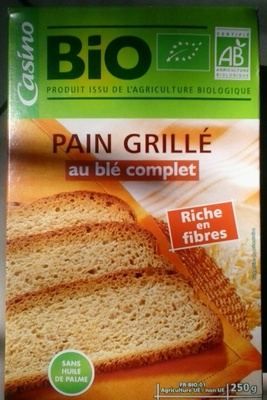




Produit: 


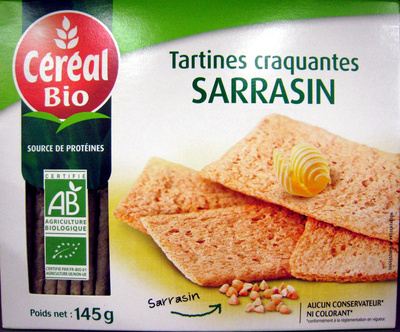




2 bons produits dans la catégorie Riz
Produit: 





Produit: 


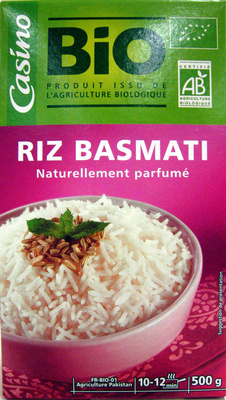




2 bons produits dans la catégorie Petit-déjeuners
Produit: 


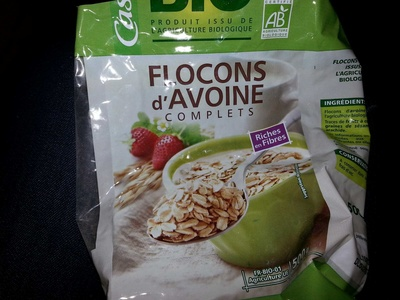




Produit: 


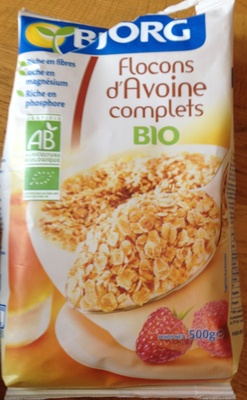

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [48]:
for cat_name in food_scoring_important['main_category_fr'].value_counts()[:7].iteritems():
    print(f'2 bons produits dans la catégorie {cat_name[0]}')
    
    display_products_radar_image(food_scoring_important[food_scoring_important['main_category_fr'] == cat_name[0]].head(2))

# Annexe : essai du composant qgrid

In [58]:
import qgrid
qgrid.show_grid(food, grid_options={'forceFitColumns': False, 'defaultColumnWidth': 150})

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': False, 'defa…